#Machine Learning and the Higgs boson "golden channel" decay in the Compact Muon Solenoid (CMS) experiment
Alternative to the title: Discrimination analysis of Higgs production signal via vector boson fusion mechanism in the four-lepton final state vs background

**Authors:** Brunella D'Anzi, Walaa Elmetenawee, Giorgia Miniello, Andre Sznajder

**Date:** March 2021, Bari, Italy





 


#Introduction to the statistical analysis problem
We perform a binary classification task using 2018 CMS Monte Carlo (MC) simulation examples representing the Vector Boson Fusion (VBF) Higgs boson production signal and the background processes. Two Machine Learning (ML) algorithms are implemented: an **Artificial Neural Network (ANN)** and a **Random Forest (RF)**.



###Multivariate Analysis and Machine learning algorithms: basic concepts
These algorithms receive as input a set of discriminating variables. Each variable alone does not allow to reach an optimal selection power between the two categories. Therefore the algorithms compute an output that combines the input variables. 

This is what every **Multivariate Analysis (MVA) discriminator** does. The discriminant output, also called *discriminator, score or classifier*, is used as a test statistic and is then adopted to perform the signal selection. It could be used as variable on which we decide to cut in an hypothesis test.

In particular, Machine Learning tools are models that have enough capacity to define its own internal representation of the data to accomplish a task : *learning from data* and make predictions without being explicitly programmed to do so. 

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/fbb053597adf9e950d7c7ccef4b72797d0a22f9d/Hypothesis_testing.png " style="display: center; margin: auto;" width="500" align="right"  /><br>
In case of binary classification, firstly the algorithm is *trained* with two dataset: 
* one that contains events distributed according to **the null (signal) hypothesis $H_{0}$** 
* another data set according to the **alternative (background) hypothesis $H_{1}$** 

and it must learn how to classify new data sets (the *test data set* in our case). 

This means that we have the same set of features (random variables) with their own distribution on the $H_{0}$ and $H_{1}$ hypothesis.
<br>
To obtain a good ML classifier with high discriminating power, we will follow the following steps: 

* **Training (learning)**: a discriminator is built by using all the input variables. Then, the
parameters are iteratively modified by comparing the discriminant output to the true origin of the dataset (supervised machine learning algorithms). This phase is crucial, one should tune the input variables and the parameters of the
algorithm.
  * Alternatively, algorithms that group and find patterns in the the data according to the observed distribution of the input data are called *unsupervised learning*. In the following exercise of supervised learning will be discussed.
  * A good habit is training multiple models with various hyperparameters (if we are talking about Neural Networks) on the “reduced” training set ( i.e. the full training set minus the so-called **Validation** set ), and then selecting the model that performs best on the validation set.
  * Once, the validation process is over, you re-train the best
model on the full training set (including the validation set), and this
gives you the final model

* **Test**: once the training has been performed, the discriminator score is computed in a *separated, independent data set* for both $H_{0}$ and $H_{1}$.
* A check is performed between test and training classifier and their performances (in terms of ROC curves are measured).
* If the test fails and performance of test and training are different, it is symptom of overtraining and our model is not good!


**Learning Goals of the exercise**

*   Students will be invited to change hyperparameters of the ANN and the RF parameters to understand better what are the consequences in terms of the models' performances.

*   Students will understand that the choice of the input variables is a key task of the algorithm since an optimal choice allows achieving the best possible performances.

*   What is more, they will have the possibility of changing the background dataset and seeing how the results change and making physical consideration.



## Uploading Files

This is a technical part that you can completely skip if you are not interested in how to upload ROOT files on a Google Colab's notebook like this. Beware: you will use a Software as Services (SAS) from [Cloud@ReCaS-Bari](https://www.recas-bari.it/index.php/it/recas-bari-i-servizi-it/recas-bari-i-servizi/cloud-recas-software-as-a-service).


In [ ]:
#This is selecting the full data set, it will take a while (2-3 minutes). 
#Comment afterwards, no need to re-run this box!

!fusermount -u drive
!pip install uproot
!pip install awkward
files = {
    "VBF_HToZZTo4mu.root" : "PCH8ZgVPVwgtqXF",
    "GluGluHToZZTo4mu.root": "64ngyPZosPKsp3Q",
    #"ZZTo4mu.root"       : "JUzjDb5tjy6tZpC",
    #"VBF_HToZZTo4e.root": "dBdaKwA13bygU8c",
    #"GluGluHToZZTo4e.root": "2DxFLqLtjkbWFdM",
    #"ZZTo4e.root"     : "NhAutemXTrVunU0",
   #"ntuple_qqH_ZZ4mu.root": "s8TRNu0vUsxfhuQ", #original ntuples of the exercise 
   #"ntuple_bkg_ZZ4mu.root": "IWEoD7cYN71ewDw"
    }
!rm -f *.root
import os 
for file in files.items():
  if not os.path.exists(file[0]):
    b = os.system ( "wget -O %s --no-check-certificate 'https://recascloud.ba.infn.it/index.php/s/%s/download'" % file )
    if b: raise IOError ( "Error in downloading the file %s : (%s)" % file )

fusermount: failed to unmount /content/drive: No such file or directory
     |████████████████████████████████| 215kB 8.4MB/s 
     |████████████████████████████████| 7.7MB 6.5MB/s 


#Introduction to the physics problem


## Particle Physics basic concepts: the Standard Model and the Higgs boson


If everything went well until now, let's have a look at the physics we are interested in!


<br>
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/SM.png" width="400" align="left">

The **Standard Model** of elementary particles represents our knowledge of the microscopic world. It describes the matter constituents (quarks and leptons) and their interactions (mediated by bosons), that are the electomagnetic, the weak and the strong interactions.

Among all these particles, the **Higgs boson** still represents a very peculiar case. It is the second heaviest known elementary particle (mass of 125 GeV) 

The ideal tool for measuring the Higgs boson properties is a particle collider. The **Large Hadron Collider** (LHC), situated nearby Geneva, between France and Switzerland, is the largest proton-proton collider ever built on Earth. It consists into a 27 km circumference ring, where proton beams are smashed at a centre-of-mass energy of 13 TeV (99.999999% of speed of light). At the LHC, 40 Million collisions / second occurs, providing an enormous amount of data. Thanks to these data, **ATLAS** and **CMS** experiments discovered the missing piece of the Standard Model, the Higgs boson, in 2012.

During a collision, the energy is so high that protons are "broken" into their fundamental components, i.e. **quarks** and **gluons**, that can interact together, producing particles that we don't observe in our everyday life, such as the top quark. The production of a top quark is, by the way, a relatively "rare" phenomenon, since there are other physical processes that occur way more often, such those initiated by strong interaction, producing lighter quarks (such as up, down, strange quarks). In high energy physics, we speak about the **cross-section** of a process. We say that, the top quark production has a smaller cross-section than the production of light quarks.

The experimental consequence is that distinguishing the decay products of a top quark from a light quark can be extremely difficult, given that the latter phenomenon has a way larger probability to happen.

### Experimental signature of Higgs boson in a particle detector

Let's first understand what are the experimental signatures and how our detectors work. This is a sketch of the CMS experiment.

<br>
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/EPS_CMS_Slice.png" width="800" >

A collider detector is organized in layers: each layer is able to distinguish and measure different particles and their properties. For example, the silicon tracker detects each particle that is charged. The electromagnetic calorimeter detects photons and electrons. The hadronic calorimeter detects hadrons (such as protons and neutrons). The muon chambers detect muons (that have a long lifetime and travel through the inner layers).

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-09%20alle%2023.42.06.png" width="200" height="200" style="display:center; margin: auto;" align="left">

Our physics problem consists into detecting the so-called **“golden channel”  $H→ZZ^{*}→4ℓ$** of a Higgs boson decay, as it has the clearest and cleanest signature of all the possible Higgs boson decay modes.The decay chain is sketched here: the Higgs boson decays into a Z boson pairs, that in turn decay into a lepton pair (in the picture, muon-antimuon or electron-positron pairs).



##Understanding Data

Let's see what you have in your directory now running the following command line:

In [ ]:
!ls -l 

total 247712
-rw-r--r-- 1 root root 190746203 Apr 14 10:56 GluGluHToZZTo4mu.root
drwxr-xr-x 1 root root      4096 Apr  7 13:36 sample_data
-rw-r--r-- 1 root root  62905623 Apr 14 10:55 VBF_HToZZTo4mu.root


In the first part of this exercise we are interested in the following ROOT files (you may look at [ROOT File](https://root.cern/manual/storing_root_objects/) if you would like to learn which kind of objects you can store in them):

*    **VBF_HToZZTo4mu.root** 
*   **GluGlueHtoZZTo4mu.root** .


The VBF ROOT file containes the Higgs boson signal production via the Vector Boson Fusion (VBF) mechanism $qq\to H \to ZZ^{(*)} \to 4\mu$ that we want to discriminate from the so-called Gluon Gluon Fusion $gg \to H \to ZZ^{(*)} \to 4\mu $ Higgs production process (see the Feynmann diagram in the picture below and the cross-sections expected for each Higgs boson production process). 

The VBF and ggH processes are characterized by the same final-state particles but we can use the value of mutiple variables,such as kinematic properties of the particles, for classifying data into the two categories.

The first one is the statistically less probable process that results in producing the Higgs boson at the Large Hadron Collider (LHC) experiments and it is still under studies by the CMS collaboration.



<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/fbb053597adf9e950d7c7ccef4b72797d0a22f9d/Cross_section_higgs_production.png" style="display: block; margin: auto;" width="800" /><br>





**Observables of the decay products** include:


*   electrically-charged leptons (electrons or muons, denoted $l$)
*   particle jets (collimated streams of particles originating from quarks or gluons, denoted $j$).

For each object, several kinetic variables are measured:

* the momentum transverse to the beam direction ($pt$)
* two angles $\theta$ (polar) and $\phi$ (azimuthal) - see picture below for the CMS reference frame used.
* for convenience, at hadron colliders, the pseudorapidity, defined as
 $\eta=-ln(tan(\eta/2))$ is used instead of the polar angle $\theta$.

We will use some of them for training our ML algorithms.
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2011.05.00.png" style="display: block; margin: auto;" width="800" /><br>




# Load data using PANDAS data frames#

Now we load two different NumPy arrays. One corresponding to the VBF $H\to ZZ^{(*)}\to 4\mu$ signal and the other one corresponds to the produced by the strong interaction (in jargon, QCD) $gg\to H\to ZZ^{(*)}\to4\mu$ background process.

In [ ]:
#import libraries 
import uproot
import numpy as np
import pandas as pd
import h5py
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from tensorflow.keras.layers import Input, Activation, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import utils
from tensorflow import random as tf_random
from keras.utils import plot_model
import random as python_random


In [ ]:
# Fix random seed for reproducibility

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
seed = 7
np.random.seed(seed)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(seed)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf_random.set_seed(seed)

# Defying what is background and signal we are interested in 

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}
params = {}
df = {}

filename['sig'] = 'VBF_HToZZTo4mu.root'
filename['bkg_ggHtoZZto4mu'] = 'GluGluHToZZTo4mu.root'
#filename['bkg_ZZto4mu'] = 'ZZTo4mu.root'
#filename['sig'] = 'VBF_HToZZTo4e.root'
#filename['bkg_ggHtoZZto4e'] = 'GluGluHToZZTo4e.root'
#filename['bkg_ZZto4e'] = 'ZZTo4e.root'

#filename['sig'] = 'ntuple_bkg_ZZ4mu.root'
#filename['bkg'] = 'ntuple_qqH_ZZ4mu.root'

# Variables from Root Tree that must be copyed to PANDA dataframe (df)
VARS = [ 'f_run', 'f_event', 'f_weight', \
        'f_massjj', 'f_deltajj', 'f_mass4l', 'f_Z1mass' , 'f_Z2mass', \
        'f_lept1_pt','f_lept1_eta','f_lept1_phi', \
        'f_lept2_pt','f_lept2_eta','f_lept2_phi', \
        'f_lept3_pt','f_lept3_eta','f_lept3_phi', \
        'f_lept4_pt','f_lept4_eta','f_lept4_phi', \
        'f_jet1_pt','f_jet1_eta','f_jet1_phi', \
        'f_jet2_pt','f_jet2_eta','f_jet2_phi' ]

#checking the dimensions of the df  
NDIM = len(VARS)
#26 variables
print("Number of kinematic variables imported from the ROOT files = %d"% NDIM)

upfile['sig'] = uproot.open(filename['sig'])
upfile['bkg_ggHtoZZto4mu'] = uproot.open(filename['bkg_ggHtoZZto4mu'])
#upfile['bkg_ZZto4mu'] = uproot.open(filename['bkg_ZZto4mu'])
#upfile['sig'] = uproot.open(filename['sig'])]
#upfile['bkg_ggHtoZZto4e'] = uproot.open(filename['bkg_ggHtoZZto4e'])
#upfile['bkg_ZZto4e'] = uproot.open(filename['bkg_ZZto4e'])

Number of kinematic variables imported from the ROOT files = 26


Let's see what we have uploaded in our Colab notebook!

In [ ]:
#Define the signal and bkg before applying physical requirement

df['sig'] = pd.DataFrame(upfile['sig'][treename].arrays(VARS, library="np"),columns=VARS)
print(df['sig'].shape)



(24867, 26)


**Comment**: We have 24867 rows, i.e. 24867 different events, and 26 columns (whose meaning will be explained later).


Let's print out the first rows of this data set!

In [ ]:
df['sig'].head()

,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,f_lept1_phi,f_lept2_pt,f_lept2_eta,f_lept2_phi,f_lept3_pt,f_lept3_eta,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi
0,1,385228,0.000176,667.271423,3.739947,124.966576,90.768616,20.508274,82.890457,0.822203,1.343706,65.486946,0.382922,2.568485,39.838531,0.546917,2.497204,28.562206,0.174666,2.013540,116.326035,-1.126533,-1.759238,90.333893,2.613415,-0.096671
1,1,385233,0.000127,129.085892,0.046317,120.231926,80.782318,34.261726,41.195362,-0.534245,2.802684,24.911942,-2.065928,0.371150,21.959597,-1.219900,-2.938914,16.676077,-0.162915,1.783374,105.491882,3.253374,-1.297283,38.978493,3.207056,1.553476
2,1,385254,0.000037,285.165222,3.166899,125.254646,91.392693,25.695290,80.788002,0.943778,0.729632,35.549721,0.935241,1.288549,23.206284,0.236346,-2.670540,14.581854,1.516623,0.284658,69.315170,2.573589,-2.030811,51.972664,-0.593310,-2.799394
3,1,385260,0.000043,52.006794,0.150803,125.067009,91.183708,19.631315,129.883423,0.235406,-1.729384,37.950790,1.226075,-2.540356,17.678413,0.096546,-1.533120,8.197763,-0.157577,0.339215,202.689468,2.530802,1.325786,41.343758,2.681605,0.858582
4,1,385263,0.000092,1044.083496,4.315164,124.305748,72.480515,43.826504,86.220734,-0.226653,0.117277,80.451378,-0.536749,0.385678,27.497240,0.827591,-0.072236,21.243813,-0.579560,-0.884727,127.192223,-2.362456,-2.945257,115.200272,1.952708,2.053301


* The first 2 columns contain information about the CMS experiment that surely we do not need to analyze here and they will be not used in the training of our Machine Learning algorithms.

* The next variabel is the `f_weights`. This corresponds to the probability of having that particular kind of physical process on the whole experiment. It is named the **Branching Ratio**. We will use it later.

* The variables `f_massjj`,`f_deltajj`,`f_mass4l`,`f_Z1mass`, and `f_Z2mass` are **high level features - event features ** since they contain overall information about the final-state particles (the mass of the two jets, their separation in space, the invariant mass of the four leptons, the masses of the two Z bosons). Note that the $m_{Z_{2}}$ mass is lighter w.r.t. the $m_{Z_{1}}$ one. Why that? Because in the Higgs boson production only one of the Z bosons is a **real particle** which has the nominal mass of 91.18 GeV. The other one is a virtual particle. 

* The remnant columns represent the **low level features - object kinematics **, the basic measurements made by the particle detector`f_lept1(2,3,4)_pt(phi,eta)` containing the 4-momenta $pt$ ( i.e. energy,  $px$ , $py$  and  $pz$ ) and the spatial information ($\eta, \phi $) about the four lepton and jets in the final states. 

The same comments hold for the background data set:

In [ ]:
#Part of the code commented can be used in the second part of the exercise
#for trying to use different background data sets

#df['bkg'] = pd.DataFrame(upfile['bkg'][treename].arrays(VARS, library="np"),columns=VARS)
#df['bkg'].head()
df['bkg_ggHtoZZto4mu'] = pd.DataFrame(upfile['bkg_ggHtoZZto4mu'][treename].arrays(VARS, library="np"),columns=VARS)
df['bkg_ggHtoZZto4mu'].head()
#df['bkg_ZZto4mu'] = pd.DataFrame(upfile['bkg_ZZto4mu'][treename].arrays(VARS, library="np"),columns=VARS)
#df['bkg_ZZto4mu'].head()
#df['bkg_ggHtoZZto4e'] = pd.DataFrame(upfile['bkg_ggHtoZZto4e'][treename].arrays(VARS, library="np"),columns=VARS)
#df['bkg_ggHtoZZto4e'].head()
#df['bkg_ZZto4e'] = pd.DataFrame(upfile['bkg_ZZto4e'][treename].arrays(VARS, library="np"),columns=VARS)
#df['bkg_ZZto4e'].head()

,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,f_lept1_phi,f_lept2_pt,f_lept2_eta,f_lept2_phi,f_lept3_pt,f_lept3_eta,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi
0,1,581632,0.000225,-999.0,-999.0,120.101105,88.262352,22.051540,57.572330,-0.433627,-0.886073,56.933735,0.496556,0.404675,33.584896,-0.037387,0.291866,10.881461,-1.112960,0.051097,73.541260,1.683280,2.736636,-999.0,-999.0,-999.0
1,1,581659,0.000277,-999.0,-999.0,124.592812,82.174683,17.613417,50.365120,0.001362,0.933713,31.548225,0.598417,-1.863556,22.758055,0.220867,-2.767246,17.264626,0.361964,-1.859138,-999.000000,-999.000000,-999.000000,-999.0,-999.0,-999.0
2,1,581671,0.000278,-999.0,-999.0,125.692230,79.915764,29.998011,72.355927,-0.238323,-2.335623,20.644920,-0.241560,1.855536,16.031651,-1.446993,1.185016,11.068296,0.366903,-0.606845,64.440544,1.886244,1.635723,-999.0,-999.0,-999.0
3,1,581724,0.000336,-999.0,-999.0,125.027504,85.200958,23.440151,43.059235,0.759979,-1.714778,19.248983,0.535979,0.420337,16.595169,-1.330326,1.656061,11.407483,-0.686118,1.295116,-999.000000,-999.000000,-999.000000,-999.0,-999.0,-999.0
4,1,581744,0.000273,-999.0,-999.0,124.917282,65.971390,14.968305,52.585011,-0.656421,-2.933651,35.095982,-1.002568,0.865173,28.146715,-0.730926,-0.876442,8.034222,-1.094436,1.783626,-999.000000,-999.000000,-999.000000,-999.0,-999.0,-999.0


In [ ]:
df['bkg'] = df['bkg_ggHtoZZto4mu']
#df['bkg'] = pd.concat([df['bkg_ZZto4L'],df['bkg_ggH']])
print(df['bkg'].shape)
#print(len(df['bkg']))
#print(len(df['bkg_ZZto4mu']))
#print(len(df['bkg_ggHtoZZto4mu']))
#print(len(df['bkg_ggHtoZZto4e']))
#print(len(df['bkg_ZZto4e']))

(134682, 26)


Note that the background data sets seem to have a very large number of events! Is that true? Let's make selection requirements!

In [ ]:
# Remove undefined variable entries VARS[i] <= -999

for i in range(NDIM):
    df['sig'] = df['sig'][(df['sig'][VARS[i]] > -999)]
    df['bkg']= df['bkg'][(df['bkg'][VARS[i]] > -999)]

# Add the columnisSignal to the dataframe containing the truth information
#i.e. it tells if that particular event is signal (isSignal=1) or background (isSignal=0)

df['sig']['isSignal'] = np.ones(len(df['sig'])) 
df['bkg']['isSignal'] = np.zeros(len(df['bkg'])) 
print("Number of Signal events = %d " %len(df['sig']['isSignal']))
print("Number of Background events = %d " %len(df['bkg']['isSignal']))


Number of Signal events = 14260 
Number of Background events = 19716 


In [ ]:
#Showing that the variable isSignal is correctly assigned for VBF signal events
print(df['sig']['isSignal'])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
24858    1.0
24859    1.0
24860    1.0
24861    1.0
24862    1.0
Name: isSignal, Length: 14260, dtype: float64


In [ ]:
#Showing that the variable isSignal is correctly assigned for bkg ()
#Some events are missing because of the selection. So we do not have in total 134682 background examples!
print(df['bkg']['isSignal'])

5         0.0
8         0.0
10        0.0
12        0.0
25        0.0
         ... 
134622    0.0
134638    0.0
134642    0.0
134646    0.0
134648    0.0
Name: isSignal, Length: 19716, dtype: float64


Let's see in which way we have to use the *f_weight* variable!

In [ ]:
# Renormalizes the events weights to give unit sum in the signal and background dataframes

# This is necessary for the ML algorithms to learn signal and background in the same proportion , 
# independently of number of events and absolute weights of events in each sample of events!

#In the pandas technical vocabolary axis=0 stands for rows, axis=1 for columns.

df['sig']['f_weight']=df['sig']['f_weight']/df['sig']['f_weight'].sum(axis=0)
df['bkg']['f_weight']=df['bkg']['f_weight']/df['bkg']['f_weight'].sum(axis=0)

print("Number SIG events=", len(df['sig']['f_weight']))
print("Number BKG events=", len(df['bkg']['f_weight']))

Number SIG events= 14260
Number BKG events= 19716


Let's merge our signal and background events!

In [ ]:
# Concatenate the signal and background dfs in a single data frame 
df_all = pd.concat([df['sig'],df['bkg']])

# Random shuffles the data set to mix signal and background events before the splitting between train and test samples
df_all = shuffle(df_all)


# Preparing input features for the ML algorithms

We have our data set ready to train our ML algorithms! Before doing that we have to decide from which input variables the computer algorithms have to learn to distinguish between *signal* and *background* events.

We can use:

1.   The *five high level input variables*
`f_massjj`,`f_deltajj`,`f_mass4l`,`f_Z1mass`, and `f_Z2mass` . 
2.   The 18 kinematic variables which characterize the four-lepton + two jest final states objects. 

To make this choice, we can look at the two set of correlation plots - the so-called **scatter plot** using the *seaborn library* - among the features at our disposal and see which set capture better the differences between signal and background events.

**Note:** this operation is quite long for the set of low level features since they are quite a lot. Skip the following two cells and trust us in using the low level features for training our ML tools! Using them we will obtain better  performance of our discriminators.

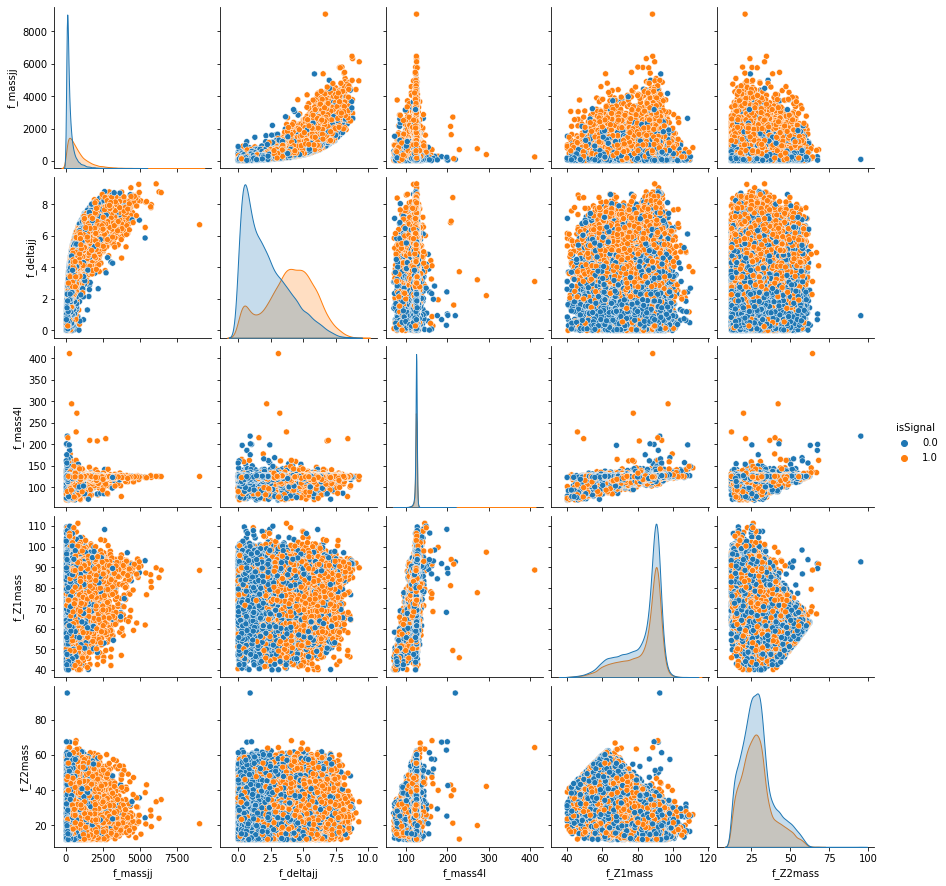

In [ ]:
#It will take a while (2 minutes), it is not necessary for the exercise.
VAR = [ 'f_massjj', 'f_deltajj', 'f_mass4l', 'f_Z1mass' , 'f_Z2mass', 'isSignal']
sns.pairplot( data=df_all.filter(VAR), hue='isSignal' , kind='scatter', diag_kind='auto' );


In [ ]:
#It will take a while (18 minutes). Skip it!
#NN_VARS = [ 'f_lept1_pt','f_lept1_eta','f_lept1_phi', \
 #         'f_lept2_pt','f_lept2_eta','f_lept2_phi', \
 #         'f_lept3_pt','f_lept3_eta','f_lept3_phi', \
 #         'f_lept4_pt','f_lept4_eta','f_lept4_phi', \
 #         'f_jet1_pt','f_jet1_eta','f_jet1_phi', \
 #         'f_jet2_pt','f_jet2_eta','f_jet2_phi', 'isSignal']
#sns.pairplot( data=df_all.filter(NN_VARS), hue='isSignal' , kind='scatter', diag_kind='auto' );


In [ ]:
# Filter dataframe leaving just NN and RF input variables  

#NN_VARS= ['f_massjj', 'f_deltajj', 'f_mass4l', 'f_Z1mass' , 'f_Z2mass']
NN_VARS = [ 'f_lept1_pt','f_lept1_eta','f_lept1_phi', \
          'f_lept2_pt','f_lept2_eta','f_lept2_phi', \
          'f_lept3_pt','f_lept3_eta','f_lept3_phi', \
          'f_lept4_pt','f_lept4_eta','f_lept4_phi', \
          'f_jet1_pt','f_jet1_eta','f_jet1_phi', \
          'f_jet2_pt','f_jet2_eta','f_jet2_phi']
         
df_input  = df_all.filter(NN_VARS)
df_target = df_all.filter(['isSignal']) #flag
df_weights = df_all.filter(['f_weight']) #the weights are also important to give as input to the training

# Transform dataframes to numpy arrays of float32 (X->NN input , Y->NN target output , W-> event weights)

NINPUT=len(NN_VARS)
print("Number NN input variables=",NINPUT)
print("NN input variables=",NN_VARS)
X  = np.asarray( df_input.values ).astype(np.float32)
Y  = np.asarray( df_target.values ).astype(np.float32)
W  = np.asarray( df_weights.values ).astype(np.float32)
print(X.shape)
print(Y.shape)
print(W.shape)
print('\n')


Number NN input variables= 18
NN input variables= ['f_lept1_pt', 'f_lept1_eta', 'f_lept1_phi', 'f_lept2_pt', 'f_lept2_eta', 'f_lept2_phi', 'f_lept3_pt', 'f_lept3_eta', 'f_lept3_phi', 'f_lept4_pt', 'f_lept4_eta', 'f_lept4_phi', 'f_jet1_pt', 'f_jet1_eta', 'f_jet1_phi', 'f_jet2_pt', 'f_jet2_eta', 'f_jet2_phi']
(33976, 18)
(33976, 1)
(33976, 1)




# Dividing the data into testing and training data set

We will split the data into two parts (one for training+validation and one for testing). Now we split the sample into training and test data sets. Have a look to the parameter setting *test_size* . 

**Question to students:** Why did we choose that small fraction of events for the testing phase? 


In [ ]:
#Classical way to proceed:
#X_train_val, X_test, Y_train_val , Y_test , W_train_val , W_test = train_test_split(X, Y, W , test_size=0.2,shuffle=None,stratify=None )
#Alternative way, the one that we chose in order to study model's performance with ease

size= int(len(X[:,0]))
test_size = int(0.2*len(X[:,0]))
print('X (features) splitting between test and training')
X_test= X[0:test_size+1,:]
print('Test:')
print(X_test.shape)
X_train_val= X[test_size+1:len(X[:,0]),:]
print('Training:')
print(X_train_val.shape)
print('\n')
print('Y (target) splitting between test and training ')
Y_test= Y[0:test_size+1,:]
print('Test:')
print(Y_test.shape)
Y_train_val= Y[test_size+1:len(Y[:,0]),:]
print('Training:')
print(Y_train_val.shape)
print('\n')
print('W (weights) splitting between test and training ')
W_test= W[0:test_size+1,:]
print('Test:')
print(W_test.shape)
W_train_val= W[test_size+1:len(W[:,0]),:]
print('Training:')
print(W_train_val.shape)
print('\n')


X (features) splitting between test and training
Test:
(6796, 18)
Training:
(27180, 18)


Y (target) splitting between test and training 
Test:
(6796, 1)
Training:
(27180, 1)


W (weights) splitting between test and training 
Test:
(6796, 1)
Training:
(27180, 1)




# Description of the Artificial Neural Network (ANN) model and KERAS API 


There are three ways to create Keras models:

* **The Sequential model**, which is very straightforward (a simple list of 
layers), but is limited to single-input, single-output stacks of layers (as the name gives away).
* **The Functional API**, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model. We will use it.
* **Model subclassing**, where you implement everything from scratch on your own. Use this if you have complex, out-of-the-box research use cases.


## Introduction to the Neural Network algorithm



A Neural Network (NN) is a biology inspired analytical model, but not bio-mimetic one. It is formed by a network of basic elements called *neurons* or *perceptrons* (see the picture below), which receive an input, change their state according to the input and produce an output.


###The neuron/perceptron concept
<img src="
https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2013.19.41.png" style="display: block; margin: auto;" width="300" height="200" align="right" /><br>
The perceptron, while it has a simple structure, has
the ability to learn and solve very complex
problems.
* It takes the inputs which are fed into the
perceptrons, multiplies them by their
weights, and computes the sum. In the first iteration the weights are set randomly.
* It adds the number one, multiplied by a “bias
weight”. This makes it possible to move the
output function of each perceptron (the
activation function) up, down, left and right
on the number graph.
* It feeds the sum through the activation
function in a simple perceptron system, the
activation function is a step function.
* The result of the step function is the neuron output.

###Neural Network Topologies

A Neural Networks (NN) can be classified according to the type of
neuron interconections and the flow of information.
<br>
####Feed Forward Networks
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.22.25.png" style="display: block; margin: auto;" width="150" align="right"/><br>
A feedforward NN is a neural network where connections
between the nodes do not form a cycle. In a feed forward
network information always moves one direction, from input to
output, and it never goes backwards. Feedforward NN can be
viewed as mathematical models of a func5on $f: R^{N} \to R^{M}$.
<br>
####Recurrent Neural Network
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.23.19.png" style="display: block; margin: auto;" width="150" align="left"/><br>
A Recurrent Neural Network (RNN) is a neural network that
allows connections between nodes in the same layer, with
themselves or with previous layers. 

Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequential input data.
<br>

###Dense Layer

A Neural Network layer is called a dense layer to indicate that it’s fully
connected.
Information about the Neural Network architectures see: [https://www.asimovinstitute.org/neural-network-zoo/](https://www.asimovinstitute.org/neural-network-zoo/)

###Artificial Neural Network

The discriminant output is computed by combining the response of multiple nodes, each representing a single neuron cell. Nodes are arranged into layers.

In an ANN the input variable values $ x_{1} ; x_{2} ;…; x_{p}$ are passed to a first input layer, whose output is passed as input to the next layer, and so on.


The last output layer is usually constituted by a single node that provides the discriminant output. Intermediate layers between the input and the output
layers are called hidden layers. Usually if a Neural Network as more than one hidden layer is called **Deep Neural Network** and is able to do by itself the feature extraction (it becomes a Deep Learning algorithm).

Such a structure is also called **Feedforward Multilayer Perceptron** (MLP, see the picture).

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2014.27.57.png" style="display: block; margin: auto;" width="400" align="left"/><br>

The output of the $k_{th}$ node of the $nth$ layers is
computed as weighted average of the input variables,
with weights that are subject to optimization via
training.

The activation layer filters out the output , using an
activation function. It converts the output of a given
layer before passing on the information to
consecutive layers. It can be a sigmoid, arctangent,
step function (new functions as ReLu,SeLu) because
they mimic a learning curve.

Then a bias or threshold parameter $w_{0}$ is applied.
This bias accounts for the random noise, in the sense
that it measures how well the model fits the training
set (how much the model is able to correctly predict
the known outputs of the training examples.)
The output of a given node is: $y^{(n)}_{k}(\vec{x})=\phi (w^{n}_{0}\sum_{j=1}^{p^{(n)}}w^{(n)}_{kj}x_{j})$.

###Supervised Learning: the loss function
In order to train the neural network, a further function is introduced in the model, the **loss (cost) function** that quantifies the error between the NN output $y(\vec{x})$and the desired target output.The choice of the loss function is directly related to the activation function used in
the output layer !

If we have binary targets $t \in\{0,1\}$ we use the **Cross Entropy Loss**: $L = -tlog[y(\vec{x})] - (1-t)log(1-y(\vec{x}))$.

During training we optimize the loss function, i.e. reduce
the error between actual and predicted values.
Since we deal with a binary classification problem, the
$y_{true}$ can take on just two values, $y_{true} =0$ (for hypothesis
$H_{0}$) and $y_{true} = 1$ (for hypothesis $H_{1}$).

A popular algorithm to optimize the weights, consists in iteratively modifying the weights afer each training observation or after a bunch of training observation by doing a minimization of the loss function.

The minimization usually proceeds via the so-called **Stochastic Gradient Descent** (SGD) which modifies weight at each iteration according to the following formula: $w^{(n)}_{ij} \to w^{(n)}_{ij} - \eta \frac{\partial L(w)}{\partial w^{(n)}_{ij}}$ .

Other more complex optimization algorithms are available in KERAS API. 

More info: [https://keras.io/api/optimizers/](https://keras.io/api/optimizers/).

###Metrics
A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

###Other parameters of a Neural Network

Hyperparameters are the variables which determines the network structure
and how the network is trained.
Hyperparameters are set before training. A list of the main parameters is below:
* `Number of Hidden Layers and units`: the hidden layers are the layers between input layer and output layer. Many hidden units within a layer can increase accuracy. Smaller number of units may cause underfitting.
* `Network Weight Initialization`: ideally, it may be better to use different weight initialization schemes according to the activation
function used on each layer. Mostly uniform distribution is used.
* `Activation functions`: they are used to introduce nonlinearity to models, which allows deep learning models to learn nonlinear prediction boundaries.
* `Learning Rate`: it defines how quickly a network updates its parameters.Low learning rate slows down the learning process but converges smoothly. Larger learning rate speeds up the learning but may not converge. Usually a decaying Learning rate is preferred.
* `Number of epochs`: it is the number of times the whole training data is shown to the network while training. Increase the number of epochs until the validation accuracy starts decreasing even when training
accuracy is increasing(overfitting).
* `Batch size`: number of sub samples (events) given to the network after the update of the parameters. A good default for batch size might be 32. Also try 32, 64, 128, 256, and so on.
* `Dropout`: regularization technique to avoid overfitting thus increasing the generalizing power. Generally, use a small dropout value of 20%-50% of neurons.Too low value has minimal effect. Value too high results in under-learning by the network.


###Applications in High Energy Physics
Nowadays ANN are used on a variety of tasks: image and speech recognition, translation,filtering, playing games, medical diagnosis, autonomous vehicles.
There are also many applications in High Energy Physics: classification of signal and background events, particle tagging, simulation of event reconstruction...


##Usage of Keras API: basic concepts

###Keras layers API
Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

###Callbacks API

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.46.18.png" style="display: block; margin: auto;" width="400" align="right"/><br>

A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

You can use callbacks to:

* Write TensorBoard logs after every batch of training to monitor your metrics
* Periodically save your model to disk
* Do early stopping
* Get a view on internal states and statistics of a model during training

More info and examples about the most used: [EarlyStopping](https://keras.io/api/callbacks/early_stopping/), [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler/), [ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/).


###Regularization layers : the dropout layer

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.46.29.png" style="display: block; margin: auto;" width="400" align="right"/><br>



The Dropout layer randomly sets input units to 0 with a frequency of `rate` at each step during training time, which helps prevent **overtraining**. Inputs not set to 0 are scaled up by `1/(1-rate)` such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to `True` such that no values are dropped during inference. When using `model.fit`, training will be appropriately set to `True` automatically, and in other contexts, you can set the kwarg explicitly to `True` when calling the layer.



# Artificial Neural Network implementation

We can now start to define a first architecture. The most simple approach is using fully connected layers (**`Dense`** layers in Keras/Tensorflow), with **`selu`** activation function and a **`sigmoid`** final layer, since we are affording a binary classification problem.

We are using the `binary_crossentropy` loss function during training, a standard loss function for binary classification problems. 
We will optimize the model with the RMSprop algorithm and we will collect `accuracy` metrics while the model is trained.

To avoid overfitting we use also Dropout layers and some callback functions.

In [ ]:
# Define NN with 3 hidden layers ( #h1=10*NINPUT , #h2=2*NINPUT , #h3=NINPUT ) & Dropout

input  = Input(shape=(NINPUT,), name = 'input') 
hidden = Dense(NINPUT*10, name = 'hidden1', kernel_initializer='normal', activation='selu')(input)
hidden = Dropout(rate=0.1)(hidden)
hidden = Dense(NINPUT*2 , name = 'hidden2', kernel_initializer='normal', activation='selu')(hidden)
hidden = Dropout(rate=0.1)(hidden)
hidden = Dense(NINPUT, name = 'hidden3', kernel_initializer='normal', activation='selu')(hidden)
hidden = Dropout(rate=0.1)(hidden)
output  = Dense(1       , name = 'output', kernel_initializer='normal', activation='sigmoid')(hidden)


# create the model
model = Model(inputs=input, outputs=output)
# Define the optimizer ( minimization algorithm )
#optim = SGD(lr=0.01,decay=1e-6)
#optim = Adam( lr=0.0001 )
#optim = Adagrad(learning_rate=0.0001 )
#optim = Adadelta(learning_rate=0.0001 )
#optim = RMSprop() #default lr= 1e-3
optim = RMSprop(lr = 1e-4)

# print learning rate each epoch to see if reduce_LR is working as expected

def get_lr_metric(optim):
    def lr(y_true, y_pred):
        return optim.lr
    return lr

# compile the model
#model.compile(optimizer=optim, loss='mean_squared_error', metrics=['accuracy'], weighted_metrics=['accuracy'])
#model.compile(optimizer=optim, loss='mean_squared_error', metrics=['accuracy'])
model.compile( optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'], weighted_metrics=['accuracy'])
# print the model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 18)]              0         
_________________________________________________________________
hidden1 (Dense)              (None, 180)               3420      
_________________________________________________________________
dropout (Dropout)            (None, 180)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 36)                6516      
_________________________________________________________________
dropout_1 (Dropout)          (None, 36)                0         
_________________________________________________________________
hidden3 (Dense)              (None, 18)                666       
_________________________________________________________________
dropout_2 (Dropout)          (None, 18)                0     

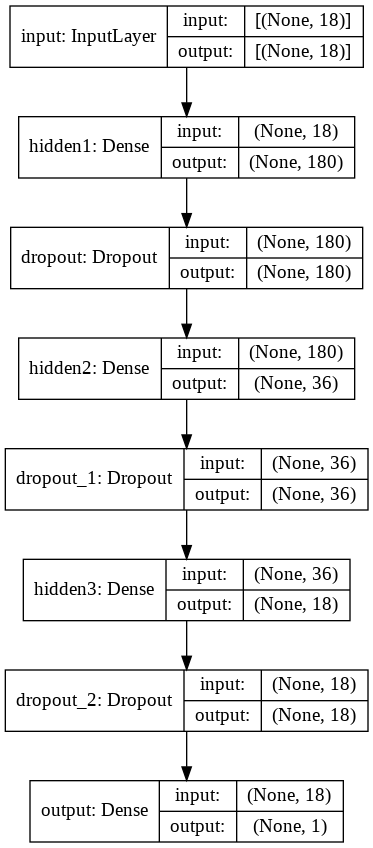

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# The student can have his/her model saved:
model_file = 'Mod_VBF.h5'

##Call functions implementation to monitor the chosen metrics
checkpoint = keras.callbacks.ModelCheckpoint(filepath = model_file,
                                             monitor = 'val_loss',
                                             mode='min',
                                             save_best_only = True)

#Stop training when a monitored metric has stopped improving
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           mode='min',# quantity that has to be monitored(to be minimized in this case)
                              patience = 50, # Number of epochs with no improvement after which training will be stopped.
                              min_delta = 1e-7,
                              restore_best_weights = True) # update the model with the best-seen weights

#Reduce learning rate when a metric has stopped improving
reduce_LR = keras.callbacks.ReduceLROnPlateau( monitor = 'val_loss',
                                              mode='min',# quantity that has to be monitored
                                              min_delta=1e-7,
                                              factor = 0.1, # factor by which LR has to be reduced...
                                              patience = 10, #...after waiting this number of epochs with no improvements 
                                              #on monitored quantity
                                              min_lr= 0.00001 ) 


#callback_list = [ early_stop, checkpoint]
callback_list = [reduce_LR, early_stop, checkpoint]
#callback_list = [checkpoint]
#accuracy (defined as the number of good matches between the predictions and the image labels)


In [ ]:
# Number of training epochs
nepochs=500
#nepochs=200
# Batch size
batch=100
# Train classifier 
history = model.fit(X_train_val[:,0:NINPUT], 
                    Y_train_val,
                    epochs=nepochs, 
                    sample_weight=W_train_val,
                    batch_size=batch,
                    callbacks = callback_list, 
                    verbose=1, # switch to 1 for more verbosity 
                    validation_split=0.3 )


Epoch 1/500
191/191 [==============================] - 3s 10ms/step - loss: 4.0652e-05 - accuracy: 0.5637 - weighted_accuracy: 0.5478 - val_loss: 3.9873e-05 - val_accuracy: 0.5895 - val_weighted_accuracy: 0.6005
Epoch 2/500
191/191 [==============================] - 1s 3ms/step - loss: 3.9381e-05 - accuracy: 0.5954 - weighted_accuracy: 0.6024 - val_loss: 3.9401e-05 - val_accuracy: 0.5977 - val_weighted_accuracy: 0.5991
Epoch 3/500
191/191 [==============================] - 1s 3ms/step - loss: 3.8955e-05 - accuracy: 0.6118 - weighted_accuracy: 0.6109 - val_loss: 3.9310e-05 - val_accuracy: 0.6096 - val_weighted_accuracy: 0.6010
Epoch 4/500
191/191 [==============================] - 1s 3ms/step - loss: 3.8817e-05 - accuracy: 0.6092 - weighted_accuracy: 0.6094 - val_loss: 3.9324e-05 - val_accuracy: 0.6188 - val_weighted_accuracy: 0.6032
Epoch 5/500
191/191 [==============================] - 1s 3ms/step - loss: 3.8812e-05 - accuracy: 0.6127 - weighted_accuracy: 0.6091 - val_loss: 3.9143e-05

In [ ]:
model = keras.models.load_model('Mod_VBF.h5')

#Description of the Random Forest (RF) and Scikit-learn library

Scikit-learn is a simple and efficient tools for predictive data analysis,accessible to everybody, and reusable in various contexts. It is built on NumPy, SciPy, and matplotlib.

Here we will use it to building a Random Forest Model and compare its discriminating performance w.r.t. the Neural Network previously implemented.

##Introduction to the Random Forest algorithm

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2016.07.15.png" width="400" align="right" /><br>


Decision Trees and their extension Random Forests are robust and easy-to-interpret machine learning algorithms for Classification tasks.

Decision Trees comprise a simple and fast way of learning a function that maps data x to outputs y, where x can be a mix of categorical and numeric
variables and y can be categorical for classification, or numeric for regression.

###Comparison with Neural Networks
(Deep) Neural Networks pretty much do the same thing. However, despite their power against larger and more complex data sets, they are *extremely hard to interpret* and they can take many iterations and hyperparameter adjustments before a good result is had.

One of the biggest advantages of using Decision Trees and Random Forests is the
ease in which we can see what features or variables contribute to the classification or regression and their relative importance based on their location depthwise in the tree.

###Decision Tree

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2016.13.21.png" width="400" align="left"/><br>

A decision tree is a sequence of selection cuts that are applied in a specified order on a given variable data sets.

Each cut splits the sample into nodes, each of which corresponds to a given number of observations classified as class1 (*signal*) or
as class2 (*background*). 

A node may be further split by the application of the subsequent cut in the
tree.Nodes in which either signal or background is largely dominant are classified as leafs, and no further selection is applied.

A node may also be classified as *leaf*, and the selection path is stopped, in case too few observations per node remain, or in case the total number of identified nodes is too large, and different criteria have been proposed and applied in real implementations.

Each branch on a tree represents
one sequence of cuts.
Along the decision tree, the same variable may appear multiple times, depending on the depth of the tree, each time with a different applied cut, possibly even with different inequality directions.

Selection cuts can be tuned in order to achieve the best split level in each node according to some metrics (gini index, cross entropy...). Most of them are related to the *purity of a node*, that is the fraction of signal events over the whole events set in a given node P=S/(S+B).

The gain due to the splitting of a node A into the nodes B1 and B2, which depends on the chosen cut, is given by: $\Delta I = I(A)- I(B) –I(B2)$ , where I denotes the adopted metric (G or E, in case of the Gini index or cross entropy introduced above). By varying the cut, the optimal gain may be achieved.

####Pruning Tree
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2016.24.02.png" width="500" height="200" align="right" /><br>
A solution to the overtraining is pruning, that is eliminating subtrees (branches) that seem too specific to training sample:
* a node and all its descendants turn into a leaf
* stop tree growth during building phase

Be Careful: early stopping condition may prevent from discovering further useful splitting. Therefore, grow the full tree and when result from subtrees are not significantly different from result of the parent one, prune them!

###From tree to the forest

The random forest algorithm consists of ‘growing’ a large number of individual decision trees that operate as an ensemble from replicas of the training samples obtained by randomly resampling the input data (features and examples).
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2016.37.10.png " width="400" align="right"/><br>
Its main characteristics are:

* No minimum size is required for leaf nodes.
The final score of the algorithm is given by an
unweighted average of the prediction (zero or
one) by each individual tree.

* Each individual tree in the random forest splits
out a class prediction and the class with the
most votes becomes our model’s prediction.

* As a large number of relatively uncorrelated
models (trees) operating as a committee,this algorithm will
outperform any of the individual constituent
models. The reason for this wonderful effect is that the
trees protect each other from their individual
errors (as long as they don’t constantly all err
in the same direction). While some trees may be wrong, many
other trees will be right, so as a group the
trees are able to move in the correct
direction.

* In a single decision tree, we consider every possible feature and pick the one that produces the best separation between the observations in
the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features (bagging).This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.


###Feature importance 

The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.


**Warning:** The impurity-based feature importances computed on tree-based models suffer from two flaws that can lead to misleading conclusions:

* They are computed on statistics derived from the training dataset and therefore do not necessarily inform us on which features are most important to make good predictions on held-out dataset. 
* They favor high cardinality features, that is features with many unique values. Permutation feature importance is an alternative to impurity-based feature importance that does not suffer from these flaws. 

For this complexity we will not use show it in this exercise



**Gift to students**: Example of how you can build on this notebook a tree by yourself!

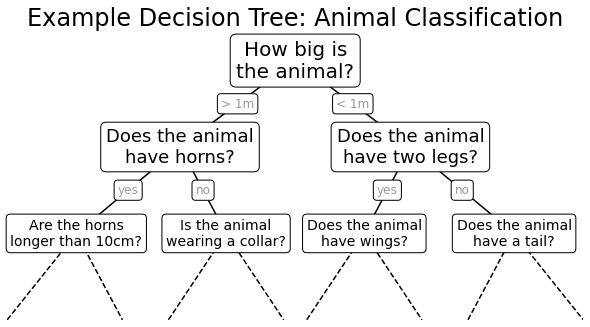

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Animal Classification', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)

text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])

fig.savefig('05.08-decision-tree.png')

#Random Forest implementation

We can now start to define a second ML architecture setting the tree construction parameters to fix:

* the assignment of a terminal node to a class
* the stop splitting of the single tree
* selection criteria of splits.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_roc_curve

In [ ]:
rfc=RandomForestClassifier( n_estimators=100,criterion='gini',
                           verbose=0 , min_samples_split=200, 
                           max_depth= 6,min_samples_leaf=150, 
                           max_features=10, bootstrap=True,random_state=7 )

In [ ]:
#Use the same sets X_train_val, X_test, Y_train_val, Y_test , W_train_val , W_test used for the NN
randomforest=rfc.fit(X_train_val,np.ravel(Y_train_val),np.ravel(W_train_val))

# Evaluating performances

We will see some terminology and concepts which are useful for the following part in which we are going to see how much our ML algorithms are able to make good predictions on new data sets.

## ROC curve and Rates concepts

There are many ways to evaluate the quality of a model’s predictions. In the ANN implementation, we were evaluating the accuracy metrics and losses of the training and validation samples.

A largely used evaluation metrics for binary classification tasks is also the Receiver Operating Characteristic curve, or **ROC curve**.

First, we introduce the terms `positive` and `negative` referring to the classifier’s prediction, and the terms `true` and `false` referring to whether the network prediction corresponds to the observation (the "truth" level). In our higgs boson binary classification exercise, we can think the `negative` outcome as the one labelling background (that, in the last sigmoid layer of our network would mean a number close to 0 - in the Random Forest score would mean a number equals to zero), and the `positive` outcome as the one labelling signal (that, in the last sigmoid layer of our network would mean a number close to 1 - random forest score equals to zero). 

* TP (true positive): the event is signal, the prediction is signal (*correct result*)
* FP (false positive): the event is background, but the prediction is signal (*unexpected result*)
* TN (true negative): the event is background, the prediction is background (*correct absence of signal*)
* FN (false negative): the event is signal, the prediction is background (*missing a true signal event*)

Some additional definitions:

* **TPR (true positive rate)**: how often the network predicts a positive outcome (*signal*), when the input is positive (*signal*): $TPR = \frac{TP}{TP+FN}$
* **FPR (false positive rate)**: how often the network predicts a positive outcome (*signal*), when the input is negative (*background*): $FPR = \frac{FP}{FP+TN}$

A good classifier should give an high TPR and a small FPR.

Quoting wikipedia:

"A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, probability of detection, or signal efficiency in high energy physics. The false-positive rate is also known as the probability of false alarm or fake rate in high energy physics."

The ROC curve requires the true binary value (0 or 1, background or signal) and the probability estimates of the positive (signal) class.

The **`roc_auc_score`** function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC. By computing the area under the roc curve, the curve information is summarized in one number. 

For more information see: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve).


The AUC is the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. The higher the AUC, the better the performance of the classifier. If the AUC is 0.5, the classifier is uninformative, i.e., it will rank equally a positive or a negative observation.

##Other metrics


The **precision/purity** is the ratio $\frac{TP}{TP + FP} $where TPR is the number of true positives and FPR the number of false positives. 
The precision is intuitively the ability of the classifier not to label as positive a sample
that is negative.


The **recall/sensitivity/TPR/signal efficiency ** is the ratio $\frac{TP}{TP + FN}$ where TP is the number of
true positives and FN the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.


The **accuracy** is defined as the number of good matches between the predictions and the true labels.

You can always achieve high accuracy on skewed/unbalanced datasets by predicting the most the same output (the most common one) for every input. Thus the another metrics, **F1** can be used when there are more positive examples than negative examples. It is defined in terms of the precision and recall as **(2 * precision * recall) / (precision + recall)**

In [ ]:
#Let's import all the metrics that we need later on!
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score , precision_score , recall_score , precision_recall_curve , roc_curve, auc , roc_auc_score 


### Overfitting and test evaluation of a MVA model
The loss function and the accuracy metrics gives us a measure of the *overtraining (overfitting)* of the ML algorithm. Over-fitting happens when a ML algorithm learns to recognize a pattern that is primarily based on the training (validation) sample and that is nonexistent when looking at the testing (training) set.

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.51.23.png" style="display: block; margin: auto;" width="400" /><br>

## Artificial Neural Network performance



Let's see what we obtained from our ANN model training making some plots!

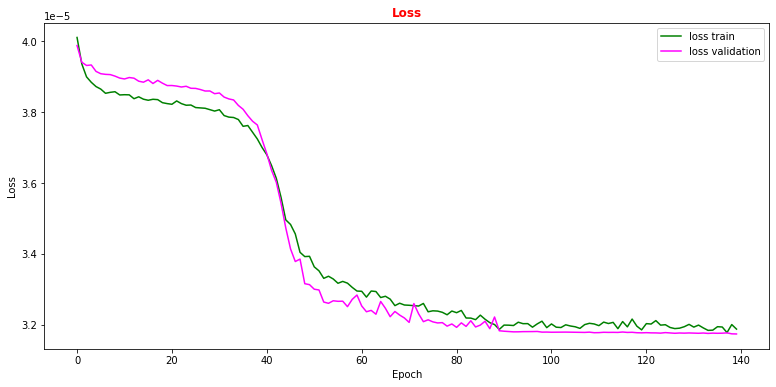

In [ ]:
# plot loss vs epoch during the training
#ax = plt.subplot(4, 2, 1)
plt.rcParams['figure.figsize'] = (13,6)
plt.plot(history.history['loss'], label='loss train',color='green')
plt.plot(history.history['val_loss'], label='loss validation',color='magenta')
plt.title("Loss", fontsize=12,fontweight='bold', color='r')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

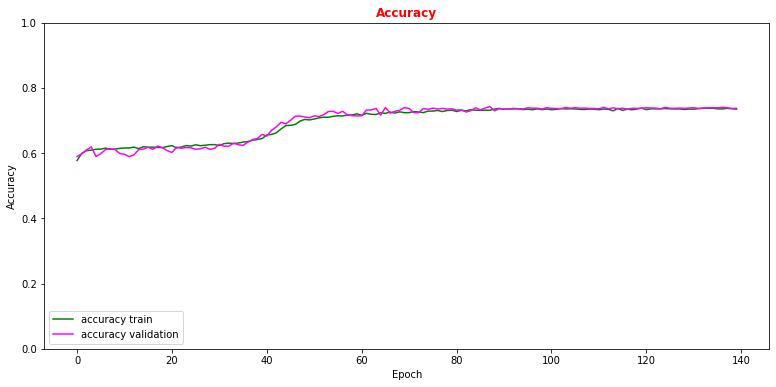

In [ ]:
# plot accuracy vs epoch during the training
#ax = plt.subplot(4, 2, 2)
plt.rcParams['figure.figsize'] = (13,6)
plt.plot(history.history['accuracy'], label='accuracy train',color='green')
plt.plot(history.history['val_accuracy'], label='accuracy validation',color='magenta')
plt.title("Accuracy",fontsize=12,fontweight='bold', color='r')
plt.ylim([0, 1.0])
plt.legend(loc="lower left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Now let's use our **test data set** in order to see which are the performance of our model to an never-seen-before data set and make comparison with what we obtained with the **training data set**!

In [ ]:
#Get DNN model predictions and performance metric curves, after having trained the model
y_true = Y_test[:,0]
y_true_train = Y_train_val[:,0]
w_test = W_test[:,0]
w_train = W_train_val[:,0]
Y_prediction = model.predict(X_test[:,0:NINPUT])

p, r, t = precision_recall_curve( y_true= Y_test, probas_pred= Y_prediction , sample_weight=w_test  )
fpr, tpr, thresholds = roc_curve( y_true= Y_test,  y_score= Y_prediction, sample_weight=w_test )


Y_prediction_train = model.predict(X_train_val[:,0:NINPUT])
p_train, r_train, t_train = precision_recall_curve( Y_train_val, Y_prediction_train , sample_weight=w_train )
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_val, Y_prediction_train, sample_weight=w_train)

# Print metrics imposing a threshold for the test sample. In this way the student
# can use later the model's score to discriminate signal and bkg events for a fixing
# score
cut_dnn=0.6

# Transform predictions into a array of entries 0,1 depending if prediction is above cut
#NN
y_pred = Y_prediction[:,0] 
y_pred[y_pred >= cut_dnn]= 1 #classify them as signal
y_pred[y_pred < cut_dnn]= 0 #classify them as background
y_pred_train = Y_prediction_train[:,0]
y_pred_train[y_pred_train>=cut_dnn]=1
y_pred_train[y_pred_train<cut_dnn]=0

print("y_true.shape",y_true.shape)
print("y_pred.shape",y_pred.shape)
print("w_test.shape",w_test.shape)
print("Y_prediction",Y_prediction)
print("y_pred",y_pred)


y_true.shape (6796,)
y_pred.shape (6796,)
w_test.shape (6796,)
Y_prediction [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]
y_pred [1. 1. 1. ... 1. 0. 1.]


In [ ]:
#Metrics for the DNN
accuracy  = accuracy_score(y_true, y_pred, sample_weight=w_test)
precision = precision_score(y_true, y_pred, sample_weight=w_test)
recall    = recall_score(y_true, y_pred, sample_weight=w_test)
f1 = 2*precision*recall/(precision+recall)
cm = confusion_matrix( y_true, y_pred, sample_weight=w_test)
print('ANN output cut: %.4f' % cut_dnn)
print('ANN Test Accuracy: %.4f' % accuracy)
print('ANN Test Precision/Purity: %.4f' % precision)
print('ANN Test Sensitivity/Recall/TPR/Signal Efficiency: %.4f' % recall)
print('ANN Test F1: %.4f' %f1)
print('')


ANN output cut:      0.6000
ANN Test Accuracy:            0.7302
ANN Test Precision/Purity:  0.7834
ANN Test Sensitivity/Recall/TPR/Signal Efficiency: 0.6306
ANN Test F1:   0.6987



The information from the evaluation metrics can be summarised in the confusion matrix whose elements, from the top-left side, represent TN, FP, FN and TP rates. 

Selection-cut on the ANN score:0.6000 

Confusion matrix ANN



Text(0.5, 1.0, 'Normalized Confusion Matrix for the Test data set - Artificial Neural Network ')

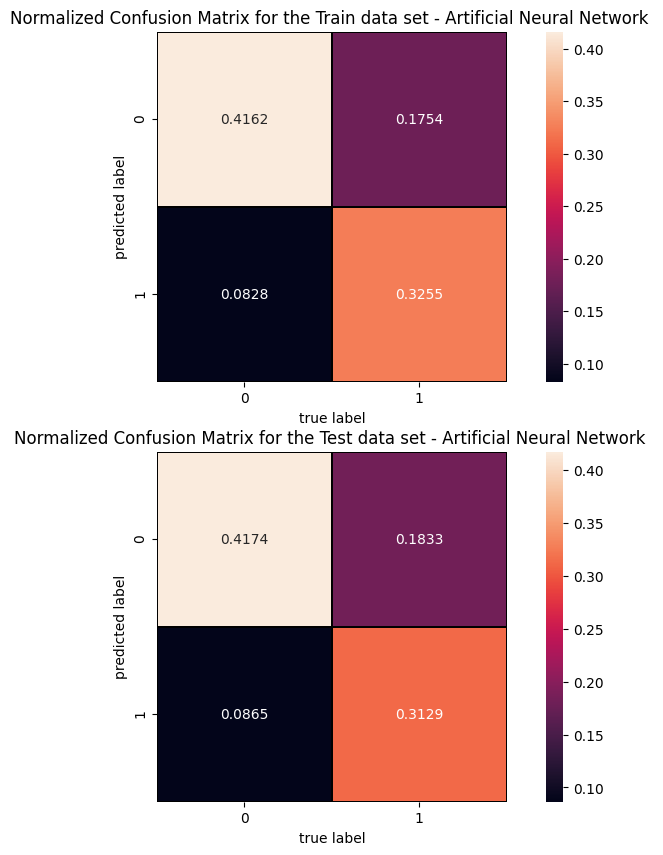

In [ ]:
print('Selection-cut on the ANN score:%.4f \n' % cut_dnn )
print('Confusion matrix ANN\n')

plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(10,10) )


plt.subplot(2,1,1)
mat_train = confusion_matrix(y_true_train, y_pred_train,sample_weight=w_train,normalize='all')
sns.heatmap(mat_train.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black' )
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Normalized Confusion Matrix for the Train data set - Artificial Neural Network ')

plt.subplot(2, 1, 2)
mat_test = confusion_matrix(y_true, y_pred ,sample_weight=w_test,normalize='all' )
sns.heatmap(mat_test.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Normalized Confusion Matrix for the Test data set - Artificial Neural Network ')


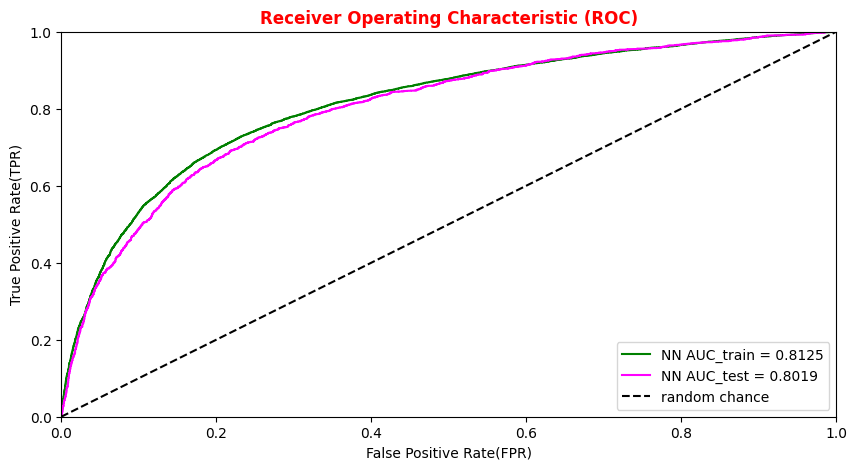

In [ ]:
# Plotting the ROC curve
#ANN
roc_auc = auc(fpr, tpr)
roc_auc_train = auc(fpr_train,tpr_train)
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(fpr_train, tpr_train,  color='green', label='NN AUC_train = %.4f' % (roc_auc_train))
plt.plot(fpr, tpr, color='magenta', label='NN AUC_test = %.4f' % (roc_auc))
#random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')
plt.xlim([0, 1.0]) #fpr
plt.ylim([0, 1.0]) #tpr
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC)',fontsize=12,fontweight='bold', color='r')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Plot DNN output 
df_sig  = df['sig'].filter(NN_VARS)
df_bkg  = df['bkg'].filter(NN_VARS)


X_sig  = np.asarray( df_sig.values ).astype(np.float32)
X_bkg  = np.asarray( df_bkg.values ).astype(np.float32)

df_test = df_all.iloc[0:test_size+1]
df_train = df_all.iloc[test_size+1:size]

df_test_sig = df_test[(df_test['isSignal']>=1)].filter(NN_VARS)
df_test_bkg = df_test[(df_test['isSignal']<1)].filter(NN_VARS)

df_train_sig = df_train[(df_train['isSignal']>=1)].filter(NN_VARS)
df_train_bkg = df_train[(df_train['isSignal']<1)].filter(NN_VARS)

X_test_sig  = np.asarray( df_test_sig.values ).astype(np.float32)
X_test_bkg  = np.asarray( df_test_bkg.values ).astype(np.float32)
X_train_sig  = np.asarray( df_train_sig.values ).astype(np.float32)
X_train_bkg  = np.asarray( df_train_bkg.values ).astype(np.float32)

print(df_test.shape)
print(df_test_sig.shape)
print(df_test_bkg.shape)
print(df_train.shape)
print(df_train_sig.shape)
print(df_train_bkg.shape)

Y_test_sig = model.predict(X_test_sig) #flag predicted on all signal events
Y_test_bkg = model.predict(X_test_bkg) #flag predicted on all background events
Y_train_sig = model.predict(X_train_sig)
Y_train_bkg = model.predict(X_train_bkg)

(6796, 27)
(2814, 18)
(3982, 18)
(27180, 27)
(11446, 18)
(15734, 18)


In [ ]:
df_test.head()

,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,f_lept1_phi,f_lept2_pt,f_lept2_eta,f_lept2_phi,f_lept3_pt,f_lept3_eta,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi,isSignal
108625,1,2140286,0.000016,1403.813599,4.951138,126.075714,91.262917,18.153624,133.437653,-0.025728,1.660384,53.383953,0.925414,2.104777,41.333282,-0.268894,1.433980,36.391411,0.190116,1.502169,276.085022,1.004758,-1.384133,49.659908,-3.946381,1.698638,0.0
99898,1,2525751,0.000068,675.225464,4.109748,124.271645,90.644386,28.533878,108.353836,1.139722,-1.149621,41.077473,0.587188,0.185424,34.781384,0.321172,-0.555514,12.235212,1.325442,-1.493317,157.849869,1.470106,2.206789,47.105186,-2.639642,-2.388201,0.0
20039,1,109656,0.000102,885.409485,5.273365,125.951752,89.910370,13.837768,104.346153,0.635767,-0.433967,37.238380,0.507499,-2.036736,24.983145,-0.087066,-0.997280,7.950587,-1.004429,-0.748619,63.835697,3.283687,2.327535,63.561504,-1.989678,2.494978,1.0
18388,1,330215,0.000074,2945.137695,6.871139,122.802269,67.644135,48.765774,62.059612,-1.757039,-0.081040,45.900188,-2.179810,0.005522,39.686279,-1.638060,1.411506,11.230325,-1.409852,-3.038516,126.206032,-3.968062,-2.786436,71.383232,2.903077,2.817388,1.0
16487,1,117842,0.000076,269.751892,1.938466,123.182159,91.967133,27.593824,141.925140,-0.056700,0.789200,64.972397,-0.908532,0.403867,35.477184,-0.400729,1.069129,9.445814,0.593864,-0.089307,134.629257,-0.235432,-1.702918,90.032043,1.703034,-2.635298,0.0


In [ ]:
df_all.head()

,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,f_lept1_phi,f_lept2_pt,f_lept2_eta,f_lept2_phi,f_lept3_pt,f_lept3_eta,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi,isSignal
108625,1,2140286,0.000016,1403.813599,4.951138,126.075714,91.262917,18.153624,133.437653,-0.025728,1.660384,53.383953,0.925414,2.104777,41.333282,-0.268894,1.433980,36.391411,0.190116,1.502169,276.085022,1.004758,-1.384133,49.659908,-3.946381,1.698638,0.0
99898,1,2525751,0.000068,675.225464,4.109748,124.271645,90.644386,28.533878,108.353836,1.139722,-1.149621,41.077473,0.587188,0.185424,34.781384,0.321172,-0.555514,12.235212,1.325442,-1.493317,157.849869,1.470106,2.206789,47.105186,-2.639642,-2.388201,0.0
20039,1,109656,0.000102,885.409485,5.273365,125.951752,89.910370,13.837768,104.346153,0.635767,-0.433967,37.238380,0.507499,-2.036736,24.983145,-0.087066,-0.997280,7.950587,-1.004429,-0.748619,63.835697,3.283687,2.327535,63.561504,-1.989678,2.494978,1.0
18388,1,330215,0.000074,2945.137695,6.871139,122.802269,67.644135,48.765774,62.059612,-1.757039,-0.081040,45.900188,-2.179810,0.005522,39.686279,-1.638060,1.411506,11.230325,-1.409852,-3.038516,126.206032,-3.968062,-2.786436,71.383232,2.903077,2.817388,1.0
16487,1,117842,0.000076,269.751892,1.938466,123.182159,91.967133,27.593824,141.925140,-0.056700,0.789200,64.972397,-0.908532,0.403867,35.477184,-0.400729,1.069129,9.445814,0.593864,-0.089307,134.629257,-0.235432,-1.702918,90.032043,1.703034,-2.635298,0.0


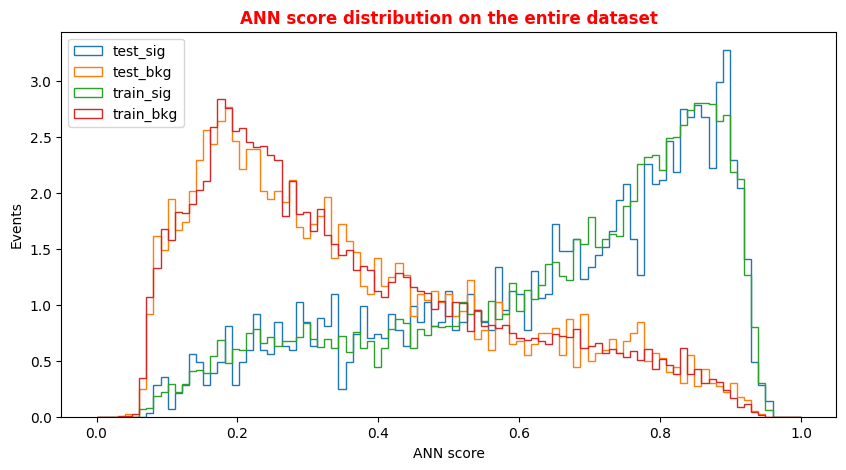

In [ ]:
#ANN output plot
#ax = plt.subplot(4, 2, 4)
X = np.linspace(0.0, 1.0, 100) #100 numbers between 0 and 1
plt.rcParams['figure.figsize'] = (10,5)
hist_test_sig = plt.hist(Y_test_sig, bins=X, label='test_sig',histtype='step',log=False,density=1)
hist_test_bkg = plt.hist(Y_test_bkg, bins=X, label='test_bkg',histtype='step',log=False,density=1)
#Y_test , Y_train_val
#hist_test= ax.hist(Y_prediction, bins=X, label='test',histtype='step' , lw=LINE_WIDTH, log=True)
#hist_train= ax.hist(Y_prediction_train, bins=X, label='train',histtype='step', lw=LINE_WIDTH,log=True)
hist_train_sig = plt.hist(Y_train_sig, bins=X, label='train_sig',histtype='step',log=False,density=1)
hist_train_bkg = plt.hist(Y_train_bkg, bins=X, label='train_bkg',histtype='step',log=False,density=1)
plt.xlabel('ANN score')
plt.ylabel('Events')
plt.legend( loc='upper left',prop={'size': 10} )
plt.title('ANN score distribution on the entire dataset',fontsize=12,fontweight='bold', color='r')
plt.show()

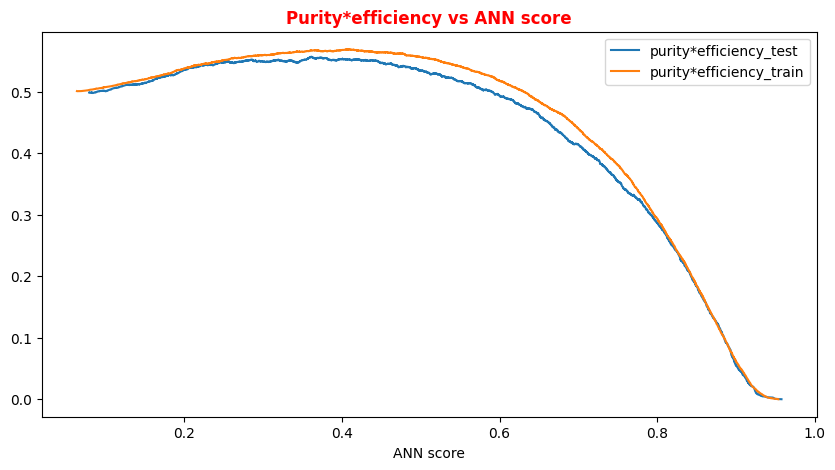

In [ ]:
# Plot Eff x Purity ANN for the signal class

#plt.plot(t, p[:-1], label='purity_test')
#plt.plot(t_train, p_train[:-1], label='purity_train')
#plt.plot(t, r[:-1], label='efficiency_test')
#plt.plot(t_train, r_train[:-1], label='efficiency_test')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(t,p[:-1]*r[:-1],label='purity*efficiency_test')
plt.plot(t_train,p_train[:-1]*r_train[:-1],label='purity*efficiency_train')
plt.xlabel('ANN score')
plt.title('Purity*efficiency vs ANN score',fontsize=12,fontweight='bold', color='r')
#plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()

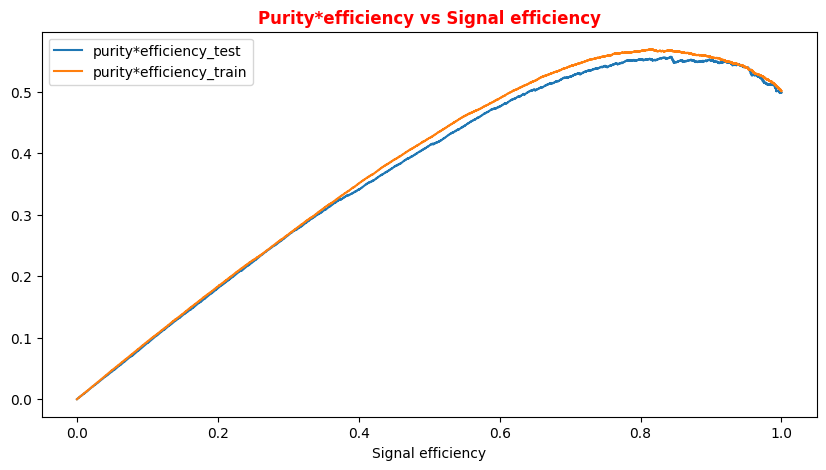

In [ ]:
# Plot Eff x Purity ANN for the signal class

#plt.plot(t, p[:-1], label='purity_test')
#plt.plot(t_train, p_train[:-1], label='purity_train')
#plt.plot(t, r[:-1], label='efficiency_test')
#plt.plot(t_train, r_train[:-1], label='efficiency_test')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(r[:-1],p[:-1]*r[:-1],label='purity*efficiency_test')
plt.plot(r_train[:-1],p_train[:-1]*r_train[:-1],label='purity*efficiency_train')
plt.xlabel('Signal efficiency')
plt.title('Purity*efficiency vs Signal efficiency',fontsize=12,fontweight='bold', color='r')
#plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()

## Exercise 1 - RF performance

Evaluate the performance of the Random Forest algorithm.



In [ ]:

## Same RandomForest 
#Test
y_pred_rfc=randomforest.predict(X_test[:,0:NINPUT])
y_pred_rfc_prob= randomforest.predict_proba(X_test[:,0:NINPUT])
y_pred_rfc_proba = y_pred_rfc_prob[:,-1]
p_rf,r_rf,t_rf= precision_recall_curve(Y_test, probas_pred=y_pred_rfc_proba , sample_weight=w_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_score=y_pred_rfc_proba, sample_weight=w_test  )

#training
y_pred_rfc_train=randomforest.predict(X_train_val[:,0:NINPUT])
y_pred_rfc_train_prob= randomforest.predict_proba(X_train_val[:,0:NINPUT])
y_pred_rfc_train_proba = y_pred_rfc_train_prob[:,-1] #last element associated to the signal probability
p_train_rf, r_train_rf, t_train_rf = precision_recall_curve(Y_train_val, y_pred_rfc_train_proba, sample_weight=w_train)
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(Y_train_val, y_pred_rfc_train_proba, sample_weight=w_train)

#Random Forest 
cut_rf=0.6

y_pred_rfc[y_pred_rfc >= cut_rf]=1 #classify them as signal
y_pred_rfc[y_pred_rfc < cut_rf]=0 #classify them as background

#print("y_pred_rfc.shape",y_pred_rfc.shape)
#print("y_pred_rfc",y_pred_rfc)

#Metrics for the RandomForest
accuracy_rfc  = accuracy_score(y_true, y_pred_rfc, sample_weight=w_test) #fraction of correctly classified events
precision_rfc = precision_score(y_true, y_pred_rfc, sample_weight=w_test) #Precision of the positive class in binary classification
recall_rfc    = recall_score(y_true, y_pred_rfc, sample_weight=w_test) #Recall of the positive class in binary classification 
f1_rfc = 2*precision_rfc*recall_rfc/(precision_rfc+recall_rfc)
print('Random Forest output cut:      %.4f' % cut_rf)
print('Random Forest Test Accuracy:            %.4f' % accuracy_rfc)
print('Random Forest Test Precision/Purity:  %.4f' % precision_rfc)
print('Random Forest Test Sensitivity/Recall/TPR/Signal Efficiency: %.4f' % recall_rfc)
print('RF Test F1:   %.4f' %f1_rfc)
print('')


Random Forest output cut:      0.6000
Random Forest Test Accuracy:            0.7341
Random Forest Test Precision/Purity:  0.7742
Random Forest Test Sensitivity/Recall/TPR/Signal Efficiency: 0.6552
RF Test F1:   0.7097



Selection-cut on the RF score: 0.6000 



Text(0.5, 1.0, 'Normalized Confusion Matrix for the Test data set - Random Forest ')

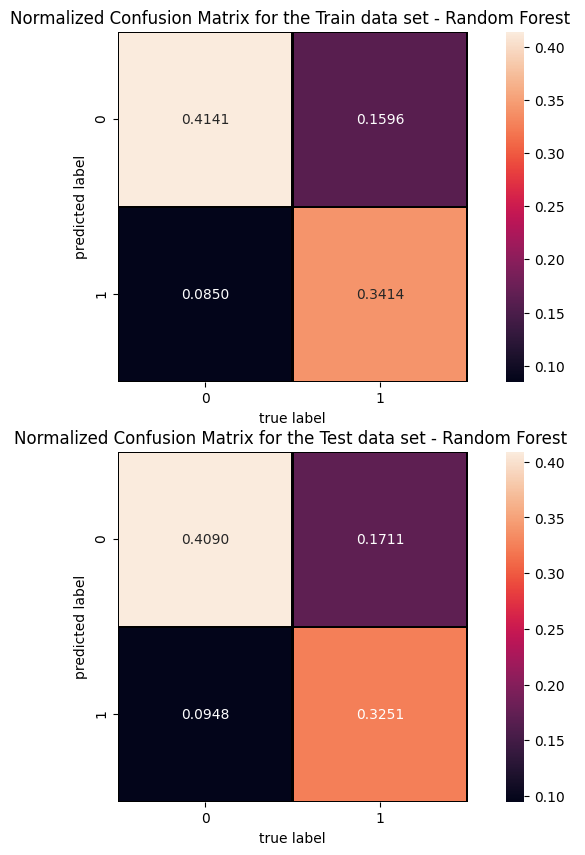

In [ ]:
print('Selection-cut on the RF score: %.4f \n' % cut_rf)
#cm_rfc = confusion_matrix( y_true, y_pred_rfc, sample_weight=w_test)
#disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels='bs' )
#disp_rfc.plot()

plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(10,10) )


plt.subplot(2,1,1)
mat = confusion_matrix(y_true_train, y_pred_rfc_train,sample_weight=w_train,normalize='all' )
sns.heatmap(mat.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Normalized Confusion Matrix for the Train data set - Random Forest ' )

plt.subplot(2, 1, 2)
mat = confusion_matrix(y_true, y_pred_rfc ,sample_weight=w_test, normalize='all' )
sns.heatmap(mat.T, square=True, annot=True, fmt='.4f' ,  cbar=True,linewidths=1,linecolor='black')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Normalized Confusion Matrix for the Test data set - Random Forest ')


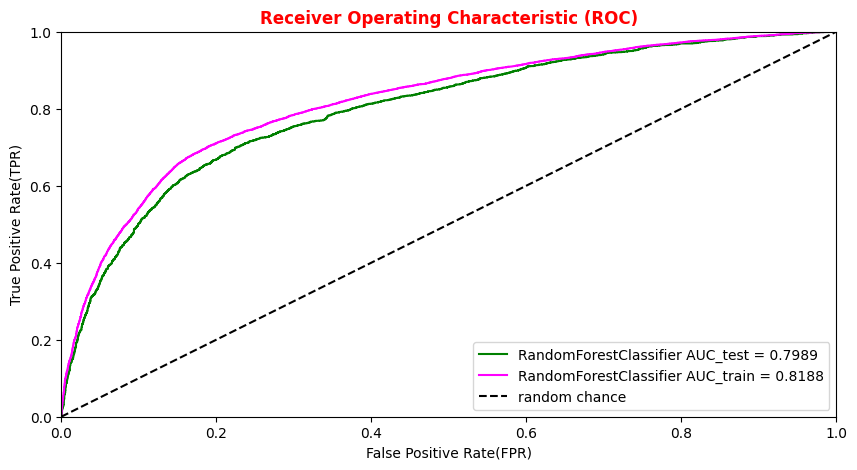

In [ ]:
#Random Forest
roc_auc_rf = auc(fpr_rf,tpr_rf)
roc_auc_rf_train = auc(fpr_train_rf,tpr_train_rf)

##ANN
plt.rcParams['figure.figsize'] = (10,5)
#Random Forest 1st method
plt.plot(fpr_rf,tpr_rf,  color='green', label='RandomForestClassifier AUC_test = %.4f' % (roc_auc_rf))
plt.plot(fpr_train_rf,tpr_train_rf, color='magenta', label='RandomForestClassifier AUC_train = %.4f' % (roc_auc_rf_train))
#Random Forest 2nd method
#rfc_disp = plot_roc_curve(rfc, X_train_val,Y_train_val,color='brown',ax=ax, sample_weight=w_train )
#rfc_disp = plot_roc_curve(rfc, X_test, Y_test, color='grey',ax=ax, sample_weight=w_test)
#random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')
plt.xlim([0, 1.0]) #fpr
plt.ylim([0, 1.0]) #tpr
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC)',fontsize=12,fontweight='bold', color='r')
plt.legend(loc="lower right")
plt.show()

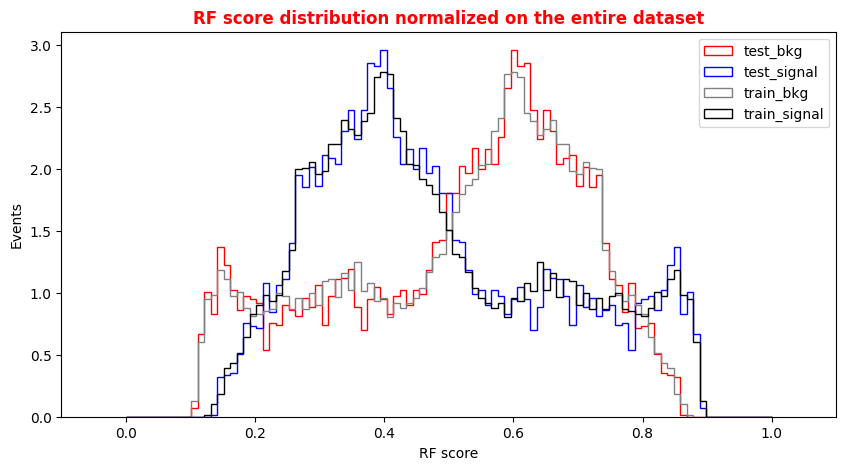

In [ ]:
# Random Forest output 

Y_sig_rfc = randomforest.predict_proba(X_sig) #flag predicted on all signal events
Y_bkg_rfc = randomforest.predict_proba(X_bkg)  #flag predicted on all background events


#Random Forest output Plot

plt.rcParams['figure.figsize'] = (10,5)
hist_test_bkg=plt.hist(y_pred_rfc_prob[:,0] , bins=X, label='test_bkg',histtype='step',color='red',log=False,density=1)
hist_test_signal=plt.hist(y_pred_rfc_prob[:,1] , bins=X, label='test_signal',histtype='step',color='blue',log=False,density=1)
hist_train_bkg= plt.hist(y_pred_rfc_train_prob[:,0] , bins=X, label='train_bkg',histtype='step',color='grey',log=False,density=1)
hist_train_signal= plt.hist(y_pred_rfc_train_prob[:,1] , bins=X, label='train_signal',histtype='step',color='black',log=False,density=1)
#hist_sig_rfc = ax.hist(Y_sig_rfc, bins=X, label='sig_rfc_all_sample',histtype='step',color='grey',log=True)
#hist_bkg_rfc = ax.hist(Y_bkg_rfc, bins=X, label='bkg_rfc_all_sample',histtype='step',color='yellow',log=True)
plt.xlabel('RF score')
plt.xlim([-0.1,1.1])
plt.ylabel('Events')
plt.title('RF score distribution normalized on the entire dataset',fontsize=12,fontweight='bold', color='r')
plt.legend(loc="best", prop={'size': 10})
plt.show()


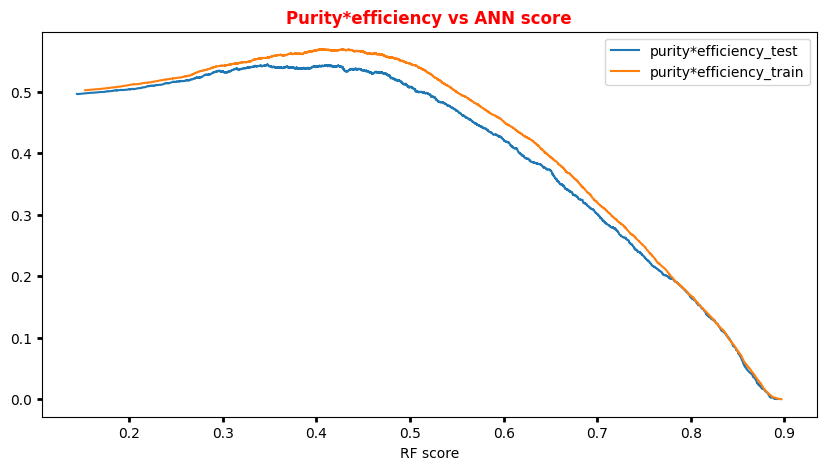

In [ ]:
# Plot Eff x Purity Random Forest for the signal class

#plt.plot(t_rf, p_rf[:-1], label='purity_test')
#plt.plot(t_train_rf, p_train_rf[:-1], label='purity_test')
#plt.plot(t_rf, r_rf[:-1], label='efficiency_test')
#plt.plot(t_train_rf, r_train_rf[:-1], label='efficiency_train')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(t_rf,p_rf[:-1]*r_rf[:-1],label='purity*efficiency_test')
plt.plot(t_train_rf,p_train_rf[:-1]*r_train_rf[:-1],label='purity*efficiency_train')
plt.xlabel('RF score')
plt.title('Purity*efficiency vs ANN score',fontsize=12,fontweight='bold', color='r')
plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()


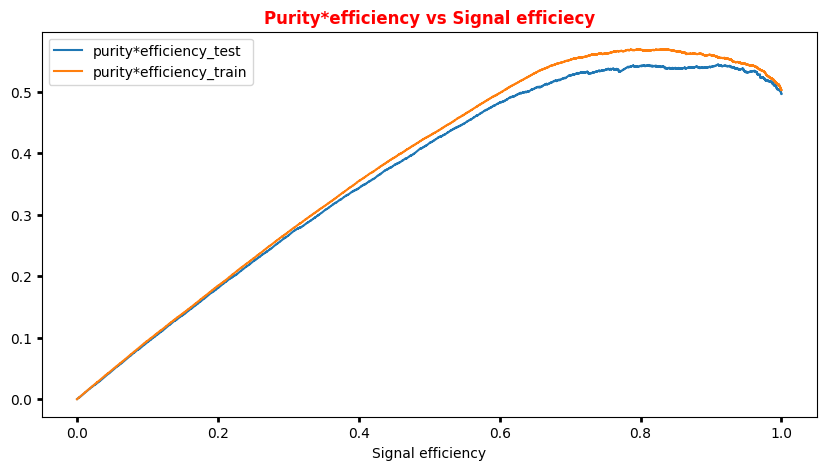

In [ ]:
# Plot Eff x Purity Random Forest for the signal class

#plt.plot(t_rf, p_rf[:-1], label='purity_test')
#plt.plot(t_train_rf, p_train_rf[:-1], label='purity_test')
#plt.plot(t_rf, r_rf[:-1], label='efficiency_test')
#plt.plot(t_train_rf, r_train_rf[:-1], label='efficiency_train')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(r_rf[:-1],p_rf[:-1]*r_rf[:-1],label='purity*efficiency_test')
plt.plot(r_train_rf[:-1],p_train_rf[:-1]*r_train_rf[:-1],label='purity*efficiency_train')
plt.xlabel('Signal efficiency')
plt.title('Purity*efficiency vs Signal efficiecy',fontsize=12,fontweight='bold', color='r')
plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()


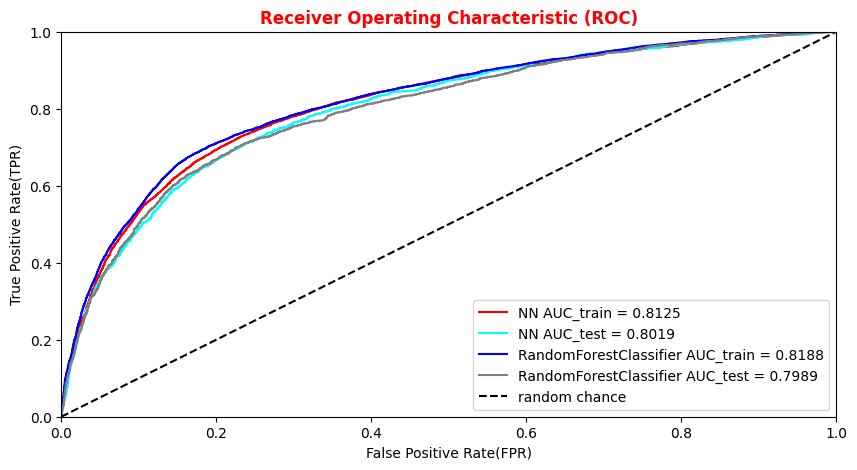

In [ ]:
##Superimposition RF and ANN ROC curves
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(fpr_train, tpr_train, color='red', label='NN AUC_train = %.4f' % (roc_auc_train))
plt.plot(fpr, tpr,  color='cyan', label='NN AUC_test = %.4f' % (roc_auc))
#Random Forest 1st method
plt.plot(fpr_train_rf,tpr_train_rf, color='blue', label='RandomForestClassifier AUC_train = %.4f' % (roc_auc_rf_train))
plt.plot(fpr_rf,tpr_rf, color='grey', label='RandomForestClassifier AUC_test = %.4f' % (roc_auc_rf))
#Random Forest 2nd method
#rfc_disp = plot_roc_curve(rfc, X_train_val,Y_train_val,color='brown',ax=ax, sample_weight=w_train )
#rfc_disp = plot_roc_curve(rfc, X_test, Y_test, color='grey',ax=ax, sample_weight=w_test)
#random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')
plt.xlim([0, 1.0]) #fpr
plt.ylim([0, 1.0]) #tpr
plt.title('Receiver Operating Characteristic (ROC)',fontsize=12,fontweight='bold', color='r')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.legend(loc="lower right")
plt.show()



# Plot  of physics quantities 

We can easily plot the quantities $m_{jj}$, $\eta_{j}$, $m_{4l}$, $m_{Z_{1}}$,$m_{Z_{2}}$ for those events in the data sets which have the NN and the RF output score greatern than the chosen decision threshold to show that the ML discriminators did learned the physics !





In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Define the data frame of high level variables and NN output
data = df_all.filter(NN_VARS)
X_all   = np.asarray( data.values ).astype(np.float32)
Y_all = model.predict(X_all)

##Artificial Neural Network score distribution at a given classifier selection cut

Let's fix a cut (looking at the performance of our models in terms of the previous **purity*efficiency** plots) on our test statistic (ANN score and RF score) to select mostly VBF Higgs production signal events! 

In [ ]:
# Add the ANN prediction array ( Y_all ) column to the complete dataframe
df_all['NNoutput'] = Y_all
# Selects events with NNoutput > cut and RFoutput > cut_rf
cut_dnn = 0.6
df_sel   = df_all[(df_all['NNoutput'] >= cut_dnn)]
df_TP    = df_all[(df_all['NNoutput'] >= cut_dnn) & (df_all['isSignal'] == 1)]
df_unsel = df_all[(df_all['NNoutput'] < cut_dnn)]
df_TN    = df_all[(df_all['NNoutput'] < cut_dnn) & (df_all['isSignal'] == 0)]

TP = len(df_TP)
FP = len(df_sel) - TP
TN = len(df_TN)
FN = len(df_unsel) - TN

truepositiverate = float(TP)/(TP+FN)
fakepositiverate = float(FP)/(FP+FN)
print('ANN score cut chosen:%.4f' % cut_dnn)
print("TP rate = %.4f"%truepositiverate)
print("FP rate = %.4f"%fakepositiverate)



ANN score cut chosen:0.6000
TP rate = 0.6439
FP rate = 0.3988


##Exercise 2 - Random Forest rates at a given classifier selection cut
Do the same for the Random Forest

In [ ]:
Y_all_rf = randomforest.predict(X_all)
df_all['RFoutput'] = Y_all_rf

cut_rf = 0.6 
df_sel_rf   = df_all[(df_all['RFoutput'] >= cut_rf)]
df_TP_rf    = df_all[(df_all['RFoutput'] >= cut_rf) & (df_all['isSignal'] == 1)]
df_unsel_rf = df_all[(df_all['RFoutput'] < cut_rf)]
df_TN_rf    = df_all[(df_all['RFoutput'] < cut_rf) & (df_all['isSignal'] == 0)]

TP_rf = len(df_TP_rf)
FP_rf = len(df_sel_rf) - TP_rf
TN_rf = len(df_TN_rf)
FN_rf = len(df_unsel_rf) - TN_rf


truepositiverate_rf = float(TP_rf)/(TP_rf+FN_rf)
fakepositiverate_rf = float(FP_rf)/(FP_rf+FN_rf)
print('RF score cut chosen: %.4f' % cut_rf)
print("TP rate = %.4f"%truepositiverate_rf)
print("FP rate = %.4f"%fakepositiverate_rf)



RF score cut chosen: 0.6000
TP rate = 0.6729
FP rate = 0.4286


##Plots of some physical quantities after the event selection is applied

Note that we have not used the *high level features* in the training phase of our models,they behaved as **spectator variables**. We will plot the distribution of events considering their actual label (in the legend **signal** and **background**) and the distinction between the two classes that our classifiers has done after having fixed a threshold on their output score.

**Question to students**: look at the plots and comment them. Taking into account the physics processes involved, do you expect these distributions?

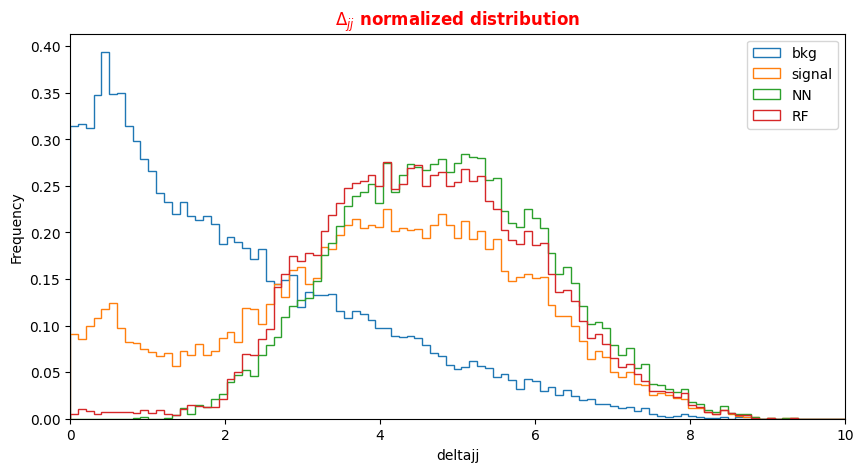

In [ ]:
# Plot high level variables for signal, background and NN/RF selected events 

plt.xlabel('deltajj')
X = np.linspace(0.0,10.,100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_deltajj'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_deltajj'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_deltajj'].plot.hist(bins=X, label='NN',histtype='step', density=1)
df_sel_rf['f_deltajj'].plot.hist(bins=X, label='RF',histtype='step', density=1)
plt.legend(loc='best')
plt.title('$\Delta_{jj}$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.xlim(0,10)
plt.show()

(0.0, 1000.0)

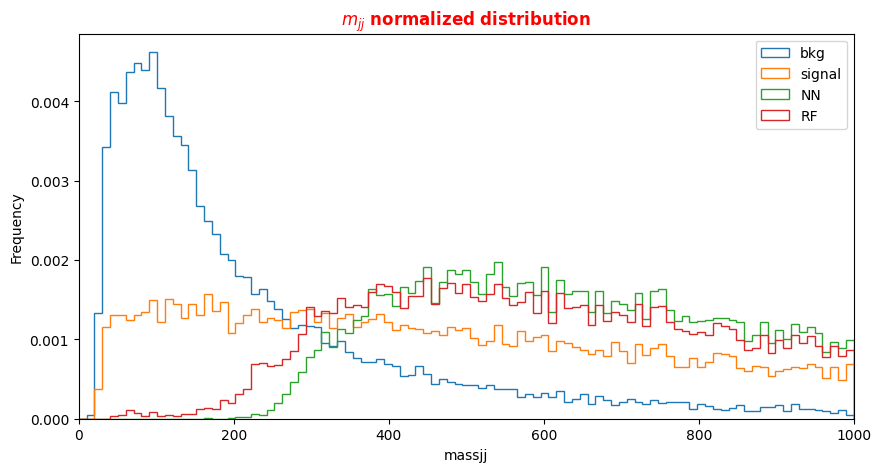

In [ ]:

# Plot  dijets mass for signal, background and NN/RF selected events 
plt.xlabel('massjj')
X = np.linspace(0.0,1000.,100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_massjj'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_massjj'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_massjj'].plot.hist(bins=X, label='NN',histtype='step', density=1)
df_sel_rf['f_massjj'].plot.hist(bins=X, label='RF',histtype='step', density=1)
plt.title('$m_{jj}$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(0,1000)

(50.0, 400.0)

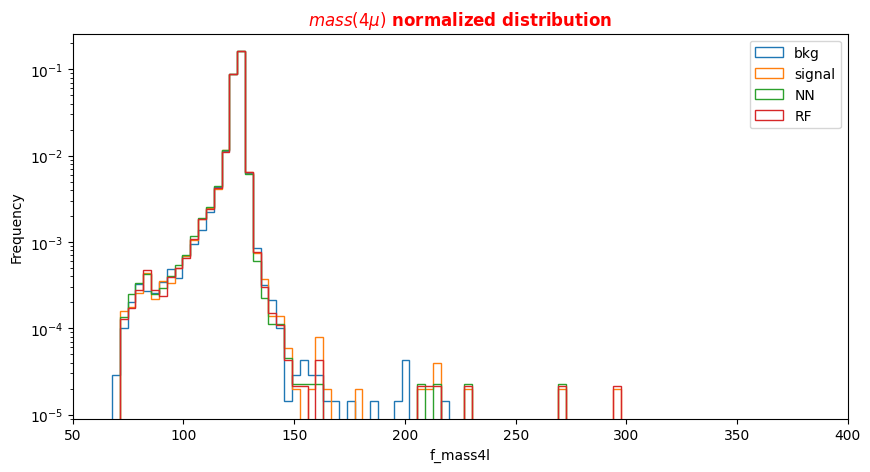

In [ ]:

# Plot  dijets mass for signal, background and NN/RF selected events 
plt.xlabel('f_mass4l')
X = np.linspace(50, 400, 100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_mass4l'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step',log=True, density=1)
df_all['f_mass4l'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step',log=True, density=1)
df_sel['f_mass4l'].plot.hist(bins=X, label='NN',histtype='step', log=True, density=1)
df_sel_rf['f_mass4l'].plot.hist(bins=X, label='RF',histtype='step',log=True, density=1)
plt.title('$mass(4\mu)$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(50,400)


(20.0, 150.0)

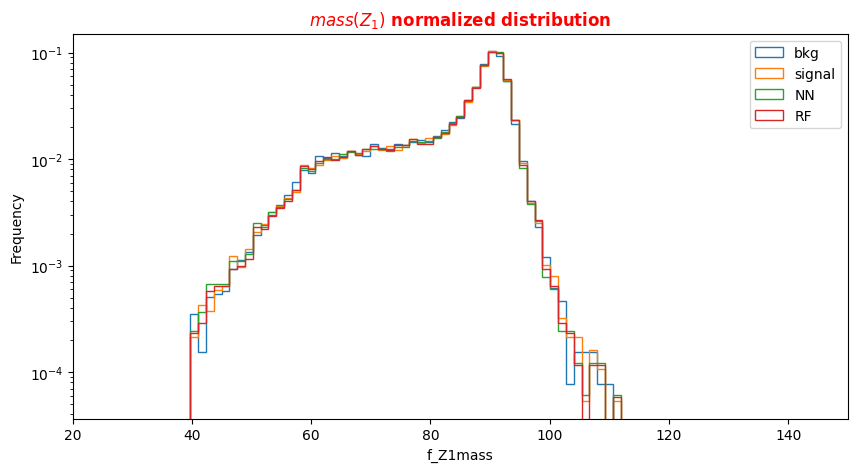

In [ ]:

plt.xlabel('f_Z1mass')
X = np.linspace(20, 150, 100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_Z1mass'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step',log=True ,density=1)
df_all['f_Z1mass'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step',log=True, density=1)
df_sel['f_Z1mass'].plot.hist(bins=X, label='NN',histtype='step', log=True,density=1)
df_sel_rf['f_Z1mass'].plot.hist(bins=X, label='RF',histtype='step',log=True, density=1)
plt.title('$mass(Z_{1})$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(20,150)


(0.0, 150.0)

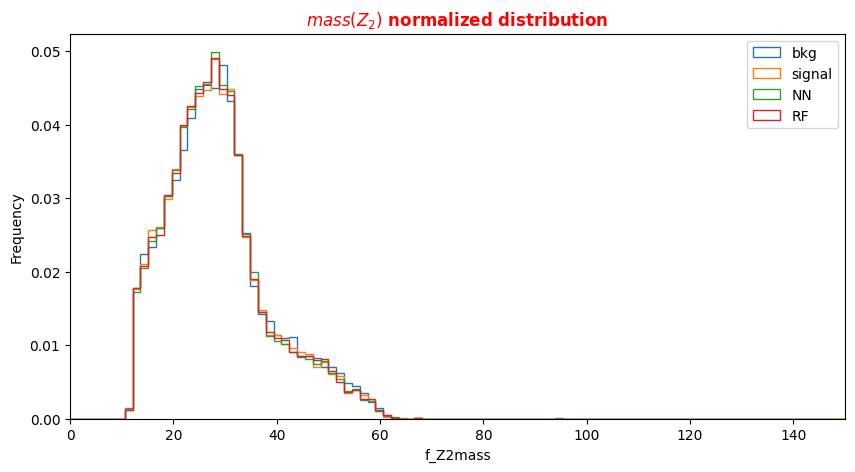

In [ ]:
plt.xlabel('f_Z2mass')
X = np.linspace(0., 150, 100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_Z2mass'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_Z2mass'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_Z2mass'].plot.hist(bins=X, label='NN',histtype='step', density=1)
df_sel_rf['f_Z2mass'].plot.hist(bins=X, label='RF',histtype='step', density=1)
plt.title('$mass(Z_{2})$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(0.,150)

Let's do the same for some variables which we have used for the training phase and comment them!

(-5.0, 5.0)

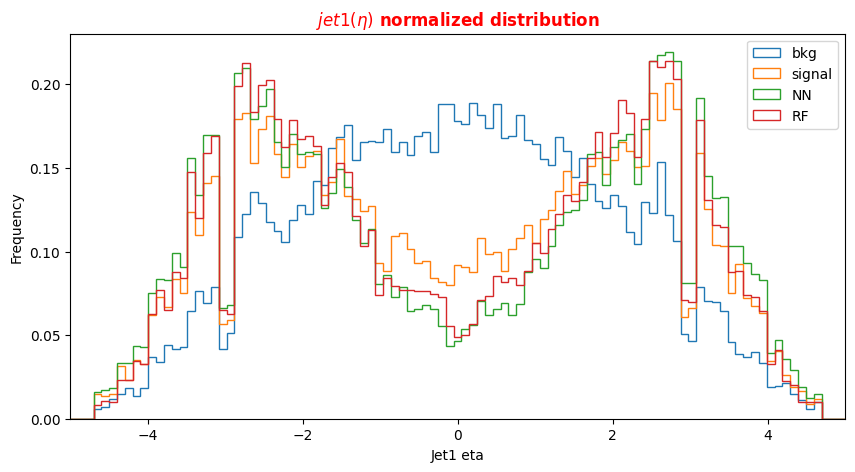

In [ ]:
# Plot Jet1 eta for signal, background and NN/RF selected events 
plt.xlabel('Jet1 eta')
X = np.linspace(-5.,5.,100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_jet1_eta'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_jet1_eta'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_jet1_eta'].plot.hist(bins=X, label='NN',histtype='step', density=1)
df_sel_rf['f_jet1_eta'].plot.hist(bins=X, label='RF',histtype='step', density=1)
plt.legend(loc='upper right')
plt.title('$jet1(\eta)$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.xlim(-5,5)

(-5.0, 5.0)

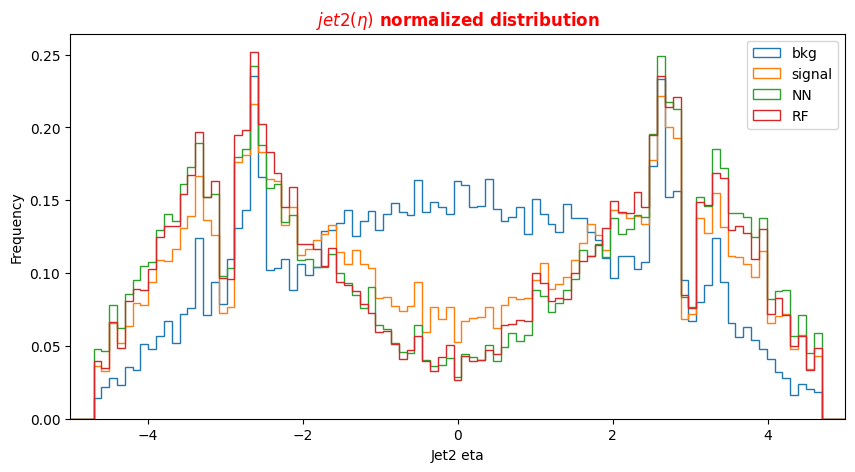

In [ ]:
# Plot Jet2 eta for signal, background and NN/RF selected events 
plt.xlabel('Jet2 eta')
X = np.linspace(-5.,5.,100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_jet2_eta'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_jet2_eta'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_jet2_eta'].plot.hist(bins=X, label='NN',histtype='step', density=1)
df_sel_rf['f_jet2_eta'].plot.hist(bins=X, label='RF',histtype='step', density=1)
plt.title('$jet2(\eta)$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(-5,5)



#Exercise 3 - Artificial Neural Network

**Question 1:** What happens if you increase/decrease the number of hidden layers ? 

**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer ?

**Question 3:** What happens if you remove dropout ?

**Question 4:** What happens if you change the batch size  ?

**Question 5** What happens if you change the optimizer or the loss function?



#Exercise 4 - Random Forest

**Question 1:** What happens if you increase/decrease the number of trees of the random forest?

**Question 2:** What happens if you increase/decrease the number of maximum splitting per tree?

**Question 3:** What happens if you change the metrics for the best splitting?



#Exercise 5 - Merging of the backgrounds
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2009.52.41.png" style="display: block; margin: auto;" width="200" align="left" /><br>
**Question to students:** Merge the background used up to now for training the ML algos together with the ROOT File named **ZZTo4mu.root**. In this case you will use also the QCD $ZZ\to 4\mu$ *irreducible* background. Uncomment the correct lines of code to proceed!




#Exercise 6 - Changing of the decay channel

**Question to students:** What happens if you switch to the $4e$ decay channel?

#Optional: ML challenging

Once you manage to improve the network performances, you can submit your results and participate to our ML challenge. The challenge samples are available in this workspace, but the truth labels (`isSignal`) are removed, so that you can't compute the AUC.

* You can participate as a single participant or as a team
* The winner is the one scoring the best AUC in the challenge samples!
* In the next box, you will find some lines of code for preparing an output zip file, containing your model and the weights you obtained out of your training
* Choose a meaningful name for your result zip file (i.e. your name, or your team name, but avoid to submit `results.zip`)
* Download the zip file and upload it here: https://recascloud.ba.infn.it/index.php/s/CnoZuNrlr3x7uPI
* You can submit multiple results, paying attention to name them accordingly (add the version number, such as `v1`, `v34`, etc.)
* You can use this exercise as a starting point (train over constituents)
* We will consider your best result for the final score.
* The winner will be asked to present his architecture!

**Have fun!**


In [ ]:
### Evaluate performance on independent sample
# DO NOT CHANGE BELOW!
from google.colab import files


files = {
    "input.csv" : "zKtZyyJhF8M995S"
    }
!rm -f *.root
import os 
for file in files.items():
  if not os.path.exists(file[0]):
    b = os.system ( "wget -O %s --no-check-certificate 'https://recascloud.ba.infn.it/index.php/s/%s/download'" % file )
    if b: raise IOError ( "Error in downloading the file %s : (%s)" % file )

filename = {}

df_challenge = {}
#Open the file with dat aset without y_true (only features used for the training of the previous NN model)
filename['input'] = 'input.csv'
df_challenge['input']  = pd.read_csv(filename['input'])
print(df_challenge['input'].shape)
df_challenge['input'].columns= NN_VARS 
X_challenge  = np.asarray( df_challenge['input'].values ).astype(np.float32)
ret = model.predict(X_challenge[:,0:NDIM])
print(ret.shape)
print(ret)
#Convert the y_pred in a dataframe 
df_answer= pd.DataFrame(ret)
df_answer.head()


(53274, 18)
(53274, 1)
[[0.68009984]
 [0.5360279 ]
 [0.3125127 ]
 ...
 [0.6291689 ]
 [0.609605  ]
 [0.6403797 ]]


,f_lept1_pt,f_lept1_eta,f_lept1_phi,f_lept2_pt,f_lept2_eta,f_lept2_phi,f_lept3_pt,f_lept3_eta,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi
30801,72.912926,-0.075142,2.063930,27.581140,0.219940,0.228071,20.615335,1.226443,1.743568,18.658497,0.933032,0.943872,80.677180,-1.877796,-1.667475,36.782722,2.513597,-1.553884
20070,62.594350,1.294136,1.360646,23.113104,0.014667,-1.435354,22.363789,0.859845,2.307411,8.149842,0.434070,1.016586,34.911840,-1.205668,-1.688821,51.766410,4.590501,-1.921332
48968,51.325012,1.879146,-2.189495,16.681896,1.099738,-0.538184,10.528803,-0.924264,-2.400206,9.599046,1.633067,2.534072,38.517870,-0.400103,1.145759,35.608418,3.161125,1.926412
10193,43.871440,0.011271,-2.748671,35.063340,0.635531,0.872923,20.762552,0.766897,-0.688530,16.712317,1.161135,1.925898,53.733196,3.834375,0.057783,53.410473,-2.957957,2.870957
31603,57.329285,0.694221,-0.203120,31.782848,1.153260,2.983758,19.152744,1.053466,0.912027,6.194074,1.260549,-1.227095,58.397076,-3.088582,-2.237611,37.591960,4.196436,2.078697


In [ ]:
#Check of the input data set without y_true
df_challenge['input'].head()

,f_lept1_pt,f_lept1_eta,f_lept1_phi,f_lept2_pt,f_lept2_eta,f_lept2_phi,f_lept3_pt,f_lept3_eta,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi
30801,72.912926,-0.075142,2.063930,27.581140,0.219940,0.228071,20.615335,1.226443,1.743568,18.658497,0.933032,0.943872,80.677180,-1.877796,-1.667475,36.782722,2.513597,-1.553884
20070,62.594350,1.294136,1.360646,23.113104,0.014667,-1.435354,22.363789,0.859845,2.307411,8.149842,0.434070,1.016586,34.911840,-1.205668,-1.688821,51.766410,4.590501,-1.921332
48968,51.325012,1.879146,-2.189495,16.681896,1.099738,-0.538184,10.528803,-0.924264,-2.400206,9.599046,1.633067,2.534072,38.517870,-0.400103,1.145759,35.608418,3.161125,1.926412
10193,43.871440,0.011271,-2.748671,35.063340,0.635531,0.872923,20.762552,0.766897,-0.688530,16.712317,1.161135,1.925898,53.733196,3.834375,0.057783,53.410473,-2.957957,2.870957
31603,57.329285,0.694221,-0.203120,31.782848,1.153260,2.983758,19.152744,1.053466,0.912027,6.194074,1.260549,-1.227095,58.397076,-3.088582,-2.237611,37.591960,4.196436,2.078697


In [ ]:
#Converting the dataframe into a csv file
#Modify the 'answer.csv' string in the line code below and insert your name!
#Example: df_answer.to_csv('mario_rossi.csv')
df_answer.to_csv('answer_2017.csv')
print('Your y_pred has been created! Download it from your Drive directory!\n')
!ls -l

Your y_pred has been created! Download it from your Drive directory!

total 11924
-rw-r--r-- 1 root root    37037 Apr 14 10:58 05.08-decision-tree.png
-rw-r--r-- 1 root root   870714 Apr 14 11:00 answer_2017.csv
-rw-r--r-- 1 root root   870714 Apr 14 10:59 answer.csv
-rw-r--r-- 1 root root 10240243 Apr 14 10:59 input.csv
-rw-r--r-- 1 root root    46423 Apr 14 10:57 model.png
-rw-r--r-- 1 root root   123744 Apr 14 10:58 Mod_VBF.h5
drwxr-xr-x 1 root root     4096 Apr  7 13:36 sample_data


 Upload your results here:
 
 https://recascloud.ba.infn.it/index.php/s/CnoZuNrlr3x7uPI
